In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, math, time,platform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import mrcnn.calculate_map as cmap
import mrcnn.calculate_map_dev as cmap2
syst = platform.system()

#### BCE Training ---------------------------------------------------------------------------------
if syst == 'Windows':
    MAP_PATH    = "E:/git_projs/MRCNN3/train_newshapes/BCE2_test_results"
#     DIR_WEIGHTS = 'F:/models_newshapes/train_fcn_l2_newshapes/fcn20181224T0000' 
    DIR_WEIGHTS = 'F:/models_newshapes/train_fcnL2_BCE2/fcn20190131T0000' 

elif syst == 'Linux':
    MAP_PATH    = "/home/kbardool/mrcnn3/train_newshapes_2/BCE_test_results"
    DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000' 
else :
    raise Error('unrecognized system ')

print(' OS ' , syst, ' : ', MAP_PATH)

#### TEST MODE ---------------------------------------------------------------------------------
# files  = ['fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5', 
#           'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5', 
#           'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5', 
#           'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5', 
#           'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']

files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
          'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
          'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
          'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
          'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
          'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25
           


COLORS = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
          '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
          '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
          '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']    
# import mrcnn.utils     as utils
# import mrcnn.visualize as visualize

CLASS_NAMES = ['ALL CLASSES', 'person', 'car', 'sun','building', 'tree', 'cloud', 'airplane', 'truck']
CLASS_IDS = [1,2,3,4,5,6,7,8]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
 OS  Linux  :  /home/kbardool/mrcnn3/train_newshapes_2/BCE_test_results


## Load and display AP_results_2019_mm_dd (calculated over individual images)

In [3]:
new_AP_results_file = 'test_AP_results_2019_04_03'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)

with open(os.path.join(MAP_PATH, new_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

Path: /home/kbardool/mrcnn3/train_newshapes_2/BCE_test_results     Filename:  test_AP_results_2019_04_03
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0002.h5 0002
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0003.h5 0003
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0004.h5 0004
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0005.h5 0005
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0006.h5 0006
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0008.h5 0008
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0009.h5 0009
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0012.h5 0012
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0016.h5 0016
/home/kbardool/models_newshapes2/train_fcn8L2

#### Display AP_Results

In [4]:
for key in sorted(APRes) :
    print('\n\nAfter {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print("\n{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))



After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.87226       0.86673       0.82015       0.85436       0.81512       0.84267       0.80859
50        0001          0.86316       0.83385       0.77899       0.83025       0.78236       0.82540       0.78128
100       0001          0.85982       0.82792       0.76686       0.82391       0.76888       0.82031       0.76489
250       0001          0.87202       0.84037       0.77984       0.83422       0.78312       0.83198       0.78262
500       0001          0.87351       0.84199       0.78024       0.83802       0.78191       0.83603       0.78235


After 0002 training epochs.
Weight file: /home/kbardool/model

## Build Mean Average Precision Data Structure 
Using loaded gt_boxes and pr_boxes.
    ALL_DATA is a dictionary keyed by class_id to dictionaries, one for each possible score. Each SCORE dictionary is itrself a dictionary with keys for iOUs 
    between 0.5 and 0.95. Each dictionary entry has the following keys:
    {'iou', 'model_thrs', 'recalls', 'precisions', 'avg_prec'}
    iou :         indicates the iOU threshold of the dictionary entry
    model_thrs:   score thresholds
    recalls   :   recall at threshold
    precision :   precision at threshold


- Create `gt_boxes_class`, `pr_boxes_class` (separated by class)  - 

### Build and Save `map_info_epochxxxx` file from  `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [6]:
for FILE_IDX in [0]:
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

    cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
    pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
    gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'
 
    with open(os.path.join(map_path, cls_info_file), 'rb') as infile:
        cls_info = pickle.load(infile)            
    with open(os.path.join(map_path, pr_boxes_file), 'rb') as infile:
        pr_boxes = pickle.load(infile)
    with open(os.path.join(map_path, gt_boxes_file), 'rb') as infile:
        gt_boxes = pickle.load(infile)
    print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    

     ## build gt_boxes_class, pr_boxes_class which only containing info for each class
        
    scores    = [ 'mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    iou_thresholds = np.arange(0.20, 0.95, 0.05)
    
    all_data = gt_boxes_class = pr_boxes_class = {}
    gt_boxes_class, pr_boxes_class  = cmap.filter_by_class(gt_boxes, pr_boxes, class_ids= CLASS_IDS )

    all_data = cmap.build_mAP_data_structure_by_class(gt_boxes_class, pr_boxes_class,  CLASS_IDS, scores, iou_thresholds)
    all_data[0] = cmap.build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores, iou_thresholds)

    print(all_data.keys())

    ### Save mAP data to file `map_info_epochxxxx.pkl` for future reuse

    map_info_file = 'test_map_info_epoch'+epochs+'BCE2.pkl'
    with open(os.path.join(map_path, map_info_file), 'wb') as outfile:
        pickle.dump(all_data, outfile)            
    print(' Datafile :', map_info_file , ' saved')

loaded : test_cls_info_epoch0500_500.pkl     test_pr_bboxes_epoch0500_500.pkl      test_gt_bboxes_epoch0500_500.pkl
 # pr keys : 500 # gt_keys:  500
 Processing class :  1
 Processing class :  2
 Processing class :  3
 Processing class :  4
 Processing class :  5
 Processing class :  6
Build mAP information for classes:  [1, 2, 3, 4, 5, 6]  and scores  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
class_id:   1  
class_id:   2  
class_id:   3  
class_id:   4  
class_id:   5  
class_id:   6  
Build mAP (all classes combined)  
 For scores:  ['mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
 score_key: mrcnn_score_orig        iou_thr: 0.20  (idx  0)  
 score_key: mrcnn_score_orig        iou_thr: 0.25  (idx  1)  
 score_key: mrcnn_score_orig        iou_thr: 0.30  (idx  2)  
 score_key: mrcnn_score_orig        iou_

dict_keys([0, 1, 2, 3, 4, 5, 6])
 Datafile : test_map_info_epoch0500BCE2.pkl  saved


### Load previously build `map_info_epochxxxx`  file

In [7]:
FILE_IDX = 2
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

map_info_file = 'test_map_info_epoch' +epochs+'_.pkl'

with open(os.path.join(MAP_PATH, map_info_file), 'rb') as infile:
    all_data = pickle.load(infile)             
print('loaded :', map_info_file)  



loaded : test_map_info_epoch0003_.pkl
loaded : test_cls_info_epoch0003_500.pkl


## Load `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [5]:
FILE_IDX = 2
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

map_info_file = 'test_map_info_epoch' +epochs+'_.pkl'
cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'

# path = "F:\\PretrainedModels"
# with open(os.path.join(path,"E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_predicted_classes_info.pkl"), 'rb') as infile:
#     class_pr_info = pickle.load(infile)            
# with open(os.path.join(path,"newshapes_predicted_bboxes.pkl"), 'rb') as infile:
#     pr_boxes = pickle.load(infile)
# with open(os.path.join(path,"newshapes_ground_truth_bboxes.pkl"), 'rb') as infile:
#     gt_boxes = pickle.load(infile)

# path = "E:\\git_projs\\MRCNN3\\train_coco"
print(' epochs :', epochs )
 
# cls_info_file = 'test_cls_info_epoch'+epochs+'_500.pkl'
# pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
# gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'
# cls_info_file = 'test_cls_info_epoch521_500.pkl'
# pr_boxes_file = 'test_pr_bboxes_epoch521_500.pkl'
# gt_boxes_file = 'test_gt_bboxes_epoch521_500.pkl'

# with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
#     cls_info = pickle.load(infile)            
with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
    cls_info_load = pickle.load(infile)            
cls_info =  [] 
cls_info.extend([cls_info_load[i] for i in CLASS_IDS])  ## Drop class 0
    

with open(os.path.join(MAP_PATH, pr_boxes_file), 'rb') as infile:
    pr_boxes = pickle.load(infile)
with open(os.path.join(MAP_PATH, gt_boxes_file), 'rb') as infile:
    gt_boxes = pickle.load(infile)
print('loaded :', cls_info_file)
print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)     

NameError: name 'epochs' is not defined

#### Print some info

In [10]:
pr_keys = list(pr_boxes.keys())
gt_keys = list(gt_boxes.keys())
# cls_keys= cls_info
# print(gt_boxes.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()), len(cls_info))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
print('keys for GT')
print(gt_boxes[gt_keys[0]].keys())
print('keys for PR')
print(pr_boxes[pr_keys[0]].keys())
print('keys for CLS_INFO')
# print(cls_info.keys())
# pp.pprint(cls_info)
print()
print(' pr key: ',pr_keys[0])
print(pr_boxes[pr_keys[0]]['boxes'])
print(pr_boxes[pr_keys[0]]['scores'])
print(pr_boxes[pr_keys[0]]['class_ids'])
print(pr_boxes[pr_keys[0]]['det_ind'])
print()
print(' gt key: ',gt_keys[0])
print(gt_boxes[gt_keys[0]]['boxes'])
print(gt_boxes[gt_keys[0]]['class_ids'])


500 500 9
500 ['newshapes_00454', 'newshapes_00301', 'newshapes_00495', 'newshapes_00121', 'newshapes_00207', 'newshapes_00469', 'newshapes_00241', 'newshapes_00319', 'newshapes_00208', 'newshapes_00026']
500 ['newshapes_00454', 'newshapes_00301', 'newshapes_00495', 'newshapes_00121', 'newshapes_00207', 'newshapes_00469', 'newshapes_00241', 'newshapes_00319', 'newshapes_00208', 'newshapes_00026']
keys for GT
dict_keys(['boxes', 'class_ids'])
keys for PR
dict_keys(['det_ind', 'mrcnn_score_norm', 'mrcnn_score_0', 'boxes', 'mrcnn_score_1_norm', 'fcn_score_2', 'fcn_score_0', 'scores', 'mrcnn_score_2', 'class_ids', 'mrcnn_score_2_norm', 'fcn_score_2_norm', 'mrcnn_score_1', 'fcn_score_1_norm', 'mrcnn_score_orig', 'fcn_score_1'])
keys for CLS_INFO

 pr key:  newshapes_00454
[[58.0, 48.0, 73.0, 105.0], [72.0, 50.0, 88.0, 52.0], [50.0, 95.0, 63.0, 99.0]]
[0.9997, 0.9911, 0.9673]
[8, 1, 1]
[1.0, 1.0, 1.0]

 gt key:  newshapes_00454
[[50, 96, 61, 99], [58, 41, 73, 110], [69, 49, 87, 52]]
[1, 8, 1

In [ ]:
# for key in sorted(pr_keys[:1000]):  ##  'newshapes_00115'
#     print(key, '  ' ,  pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] , ' - ',pr_boxes[key]['mrcnn_score_1'],pr_boxes[key]['mrcnn_score_2'])
#     print(key, '  ' , pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] )

#### `cls_info` - display information

In [14]:
print(len(cls_info), len(cls_info_load))
print(cls_info[1]['scores'][:20])
print(cls_info[1]['mrcnn_score_orig'][:20])
print(cls_info[1]['mrcnn_score_norm'][:20])
print()
print(cls_info[1]['mrcnn_score_0'][:20])
print(cls_info[1]['mrcnn_score_1'][:20])
print(cls_info[1]['mrcnn_score_2'][:20])
 

8 9
[0.9991, 0.9997, 0.9977, 0.9998, 0.9999, 0.9949, 0.8119, 0.9412, 0.838, 0.9995, 0.9987, 0.949, 0.7521, 0.6302, 0.964, 0.9988, 0.9979, 0.9745, 0.4371, 0.9982]
[0.9991, 0.9997, 0.9977, 0.9998, 0.9999, 0.9949, 0.8119, 0.9412, 0.838, 0.9995, 0.9987, 0.949, 0.7521, 0.6302, 0.964, 0.9988, 0.9979, 0.9745, 0.4371, 0.9982]
[1.0, 1.0, 0.998, 1.0, 1.0, 0.995, 0.812, 1.0, 0.8904, 1.0, 0.9993, 0.9495, 0.7525, 1.0, 1.0, 1.0, 0.999, 0.9756, 1.0, 1.0]

[0.9971, 0.9932, 0.9967, 0.9961, 0.997, 0.992, 0.8116, 0.9843, 0.8799, 0.9978, 0.9938, 0.941, 0.7473, 0.9971, 0.9911, 0.9971, 0.9948, 0.9739, 0.996, 0.9932]
[0.7113, 0.6816, 0.6931, 0.6987, 0.7257, 0.6985, 0.551, 0.6767, 0.5962, 0.6953, 0.6873, 0.6508, 0.5081, 0.7058, 0.6845, 0.7153, 0.714, 0.6477, 0.6898, 0.6637]
[0.7113, 0.6816, 0.6931, 0.6987, 0.7257, 0.6985, 0.551, 0.6767, 0.5962, 0.6953, 0.6873, 0.6508, 0.5081, 0.7058, 0.6845, 0.7153, 0.714, 0.6477, 0.6898, 0.6637]


In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 2)
# print(len(pr_boxes_class.keys()), len(gt_boxes_class.keys()))

In [ ]:
# for img_id in pred_boxes.keys():
#     arg_sort = np.argsort(pred_boxes[img_id]['scores'])
#     pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id]['scores'])[arg_sort].tolist()
#     pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()

# print(type(class_pr_info), type(pr_boxes))    
# pr_keys = list(gt_boxes.keys())
# print(len(pr_keys))
# pp.pprint(class_pr_info[6].keys())

# class_stats  = {}
# class_stats.setdefault('avg', [cls['avg'] for cls in class_pr_info])
# class_stats.setdefault('pct', [cls['percentiles'] for cls in class_pr_info])   
# pp.pprint(class_stats)

# print(len(pr_keys), pr_keys[0])
# print(pr_boxes[pr_keys[0]])

# print(pred_boxes[pr_keys[0]])
# print(len(gt_boxes.keys()))

#### Print some info

In [ ]:
print(gt_boxes['newshapes_00469'])
print(gt_boxes_class[1]['newshapes_00469'])
print()
pp.pprint(pr_boxes['newshapes_00469'])
pp.pprint(pr_boxes_class[1]['newshapes_00469'])

In [ ]:
# class_data = all_data[1]
# score_key = 'scores'
# for idx, iou_key in enumerate(sorted(class_data[score_key])):
#     print(idx, iou_key)
bb = [0.7777, 0.7569, 0.6442, 0.4946, 0.3545, 0.1565, 0.0654, 0.0264, 0.005]
avg_precs = [" {:10.4f}".format(ap) for ap in bb]
# avg_precs = [str(ap) for ap in bb]
b1 = ""
print(b1.join(avg_precs))

## Display distribution of various scores using `cls_info`

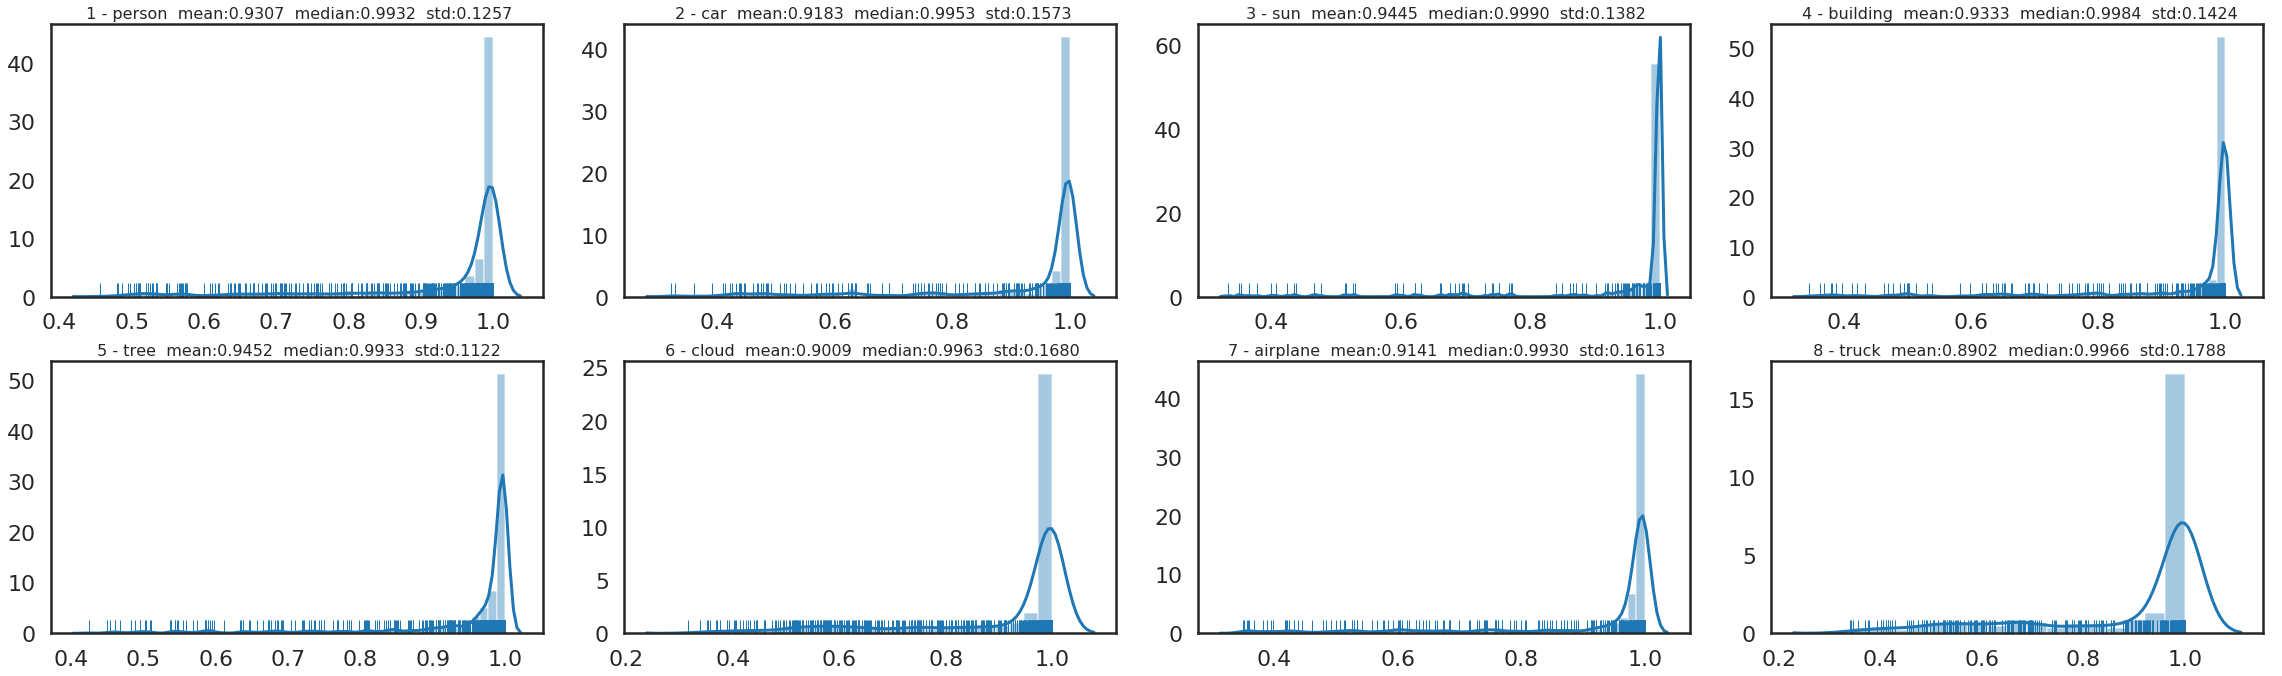

In [13]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_orig')

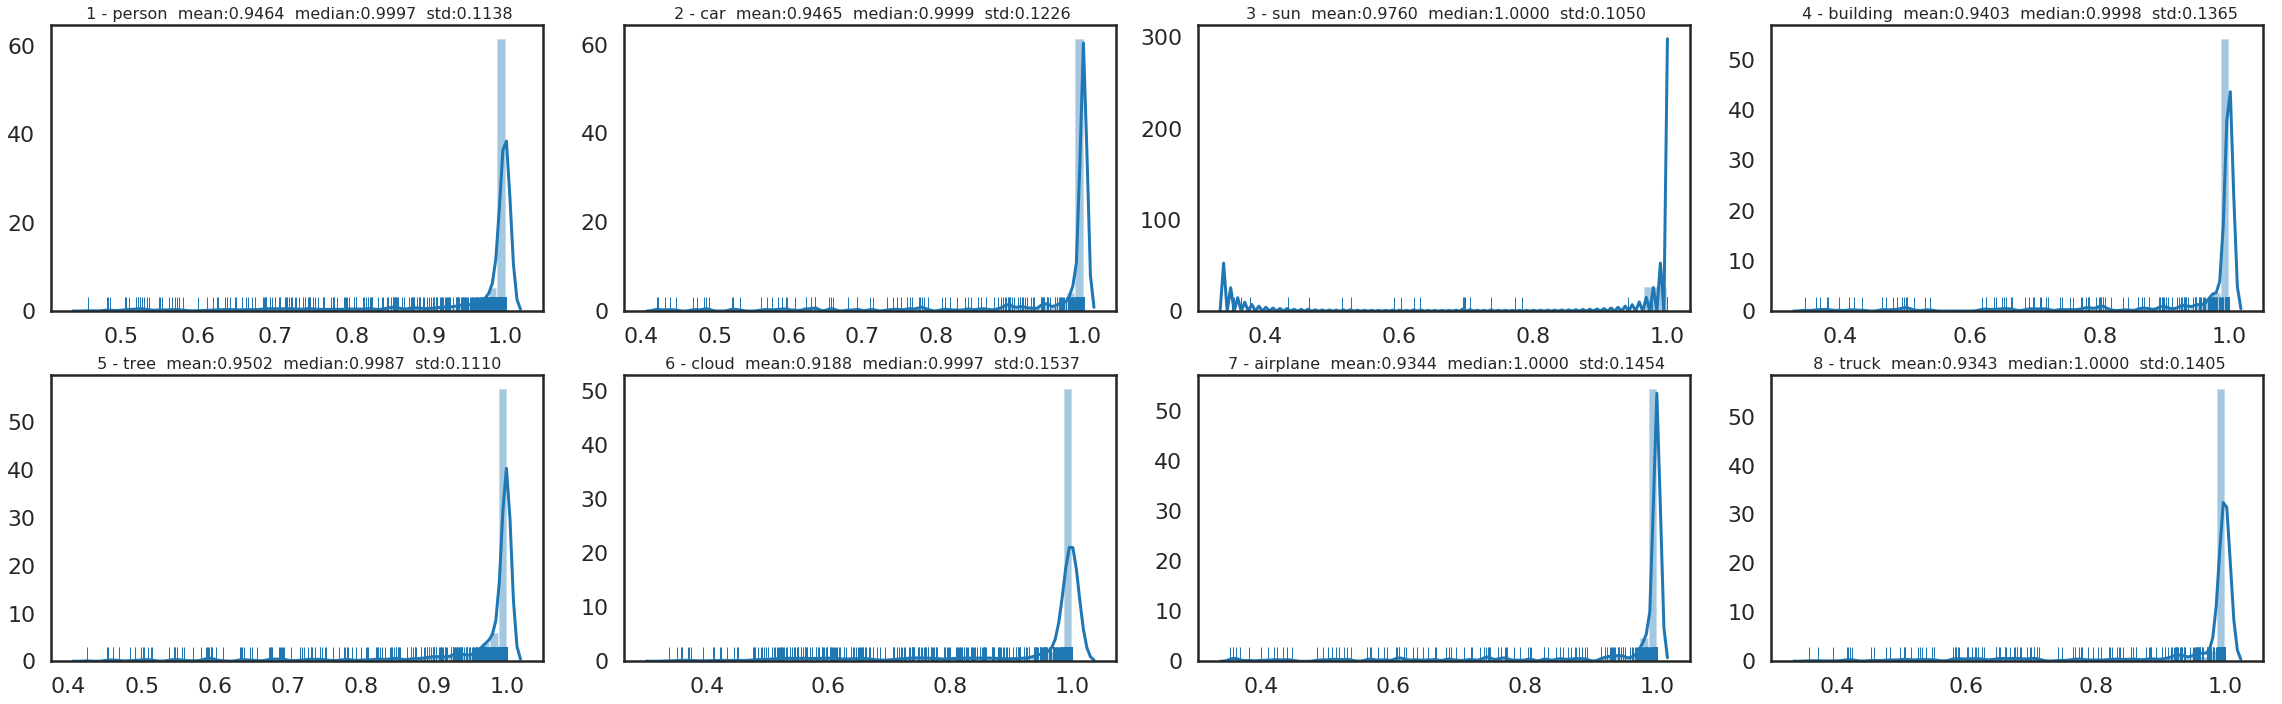

In [13]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_norm')

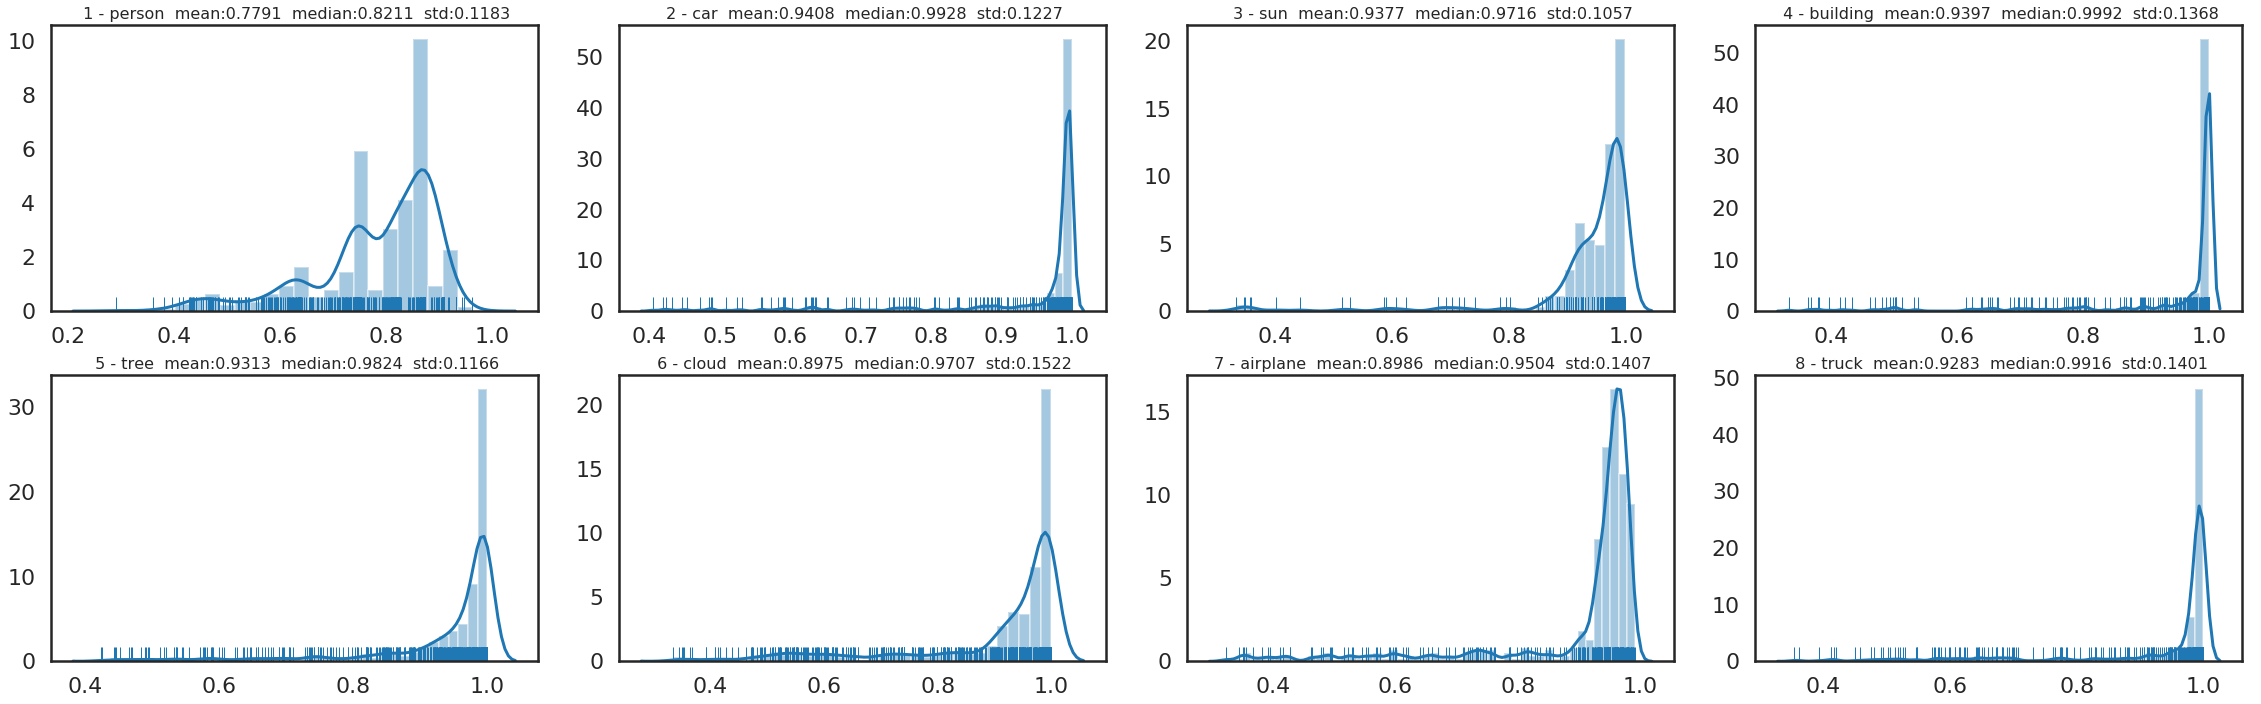

In [15]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_0')

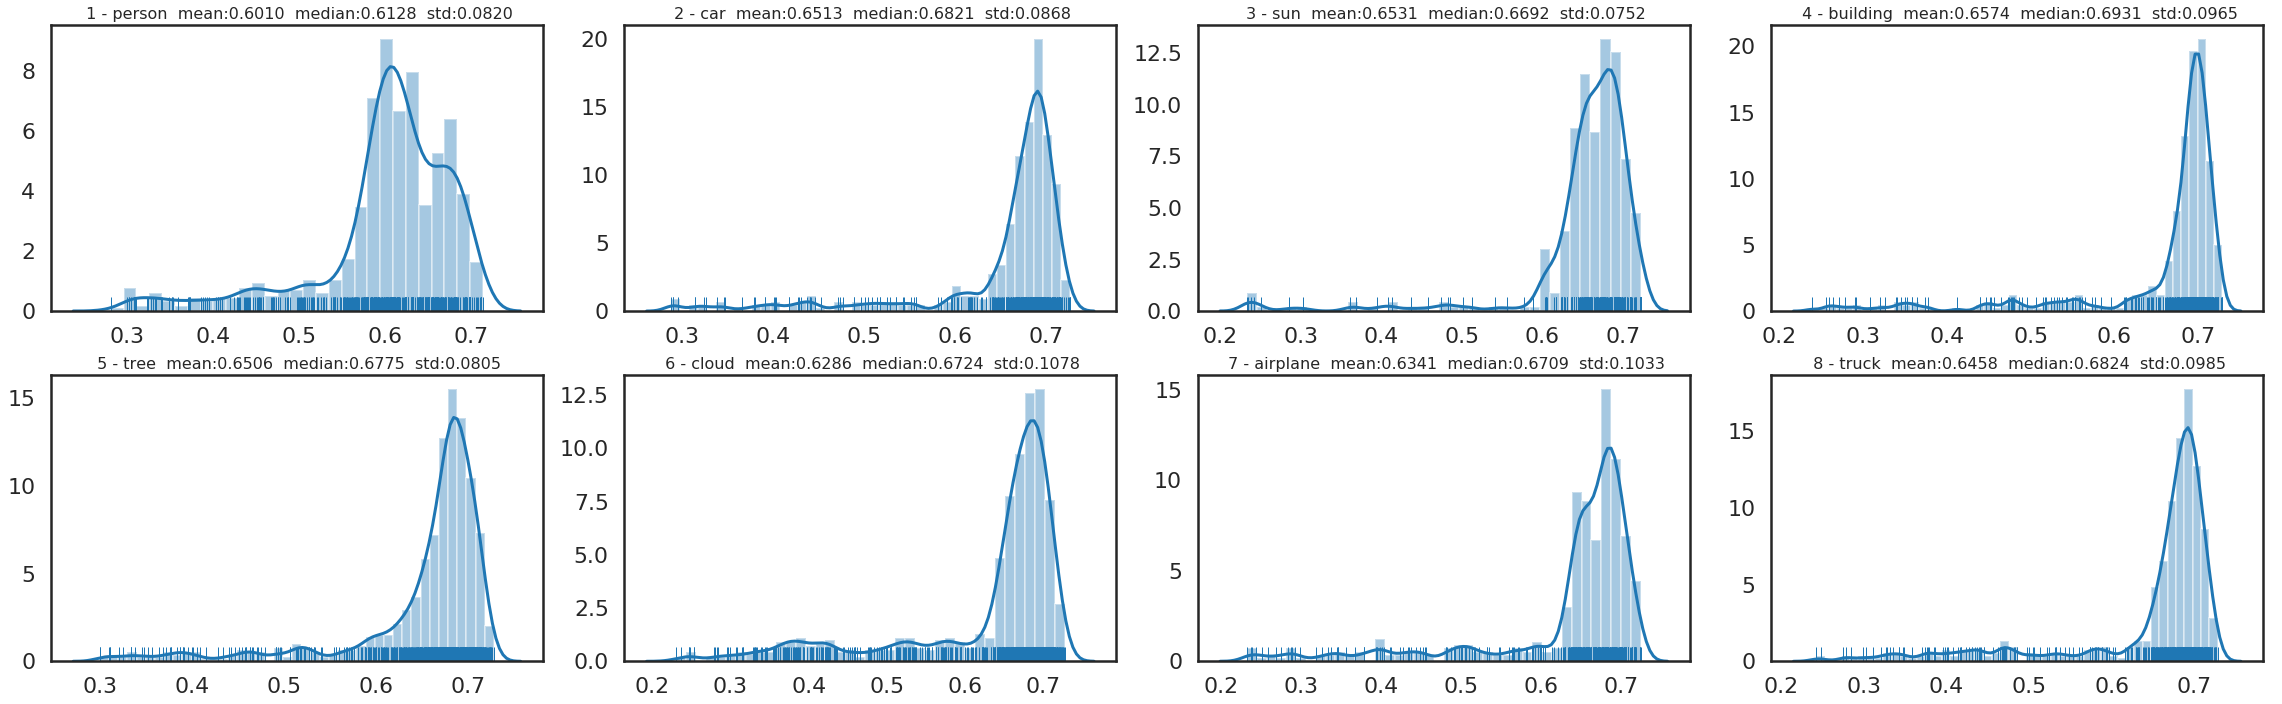

In [16]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_1')

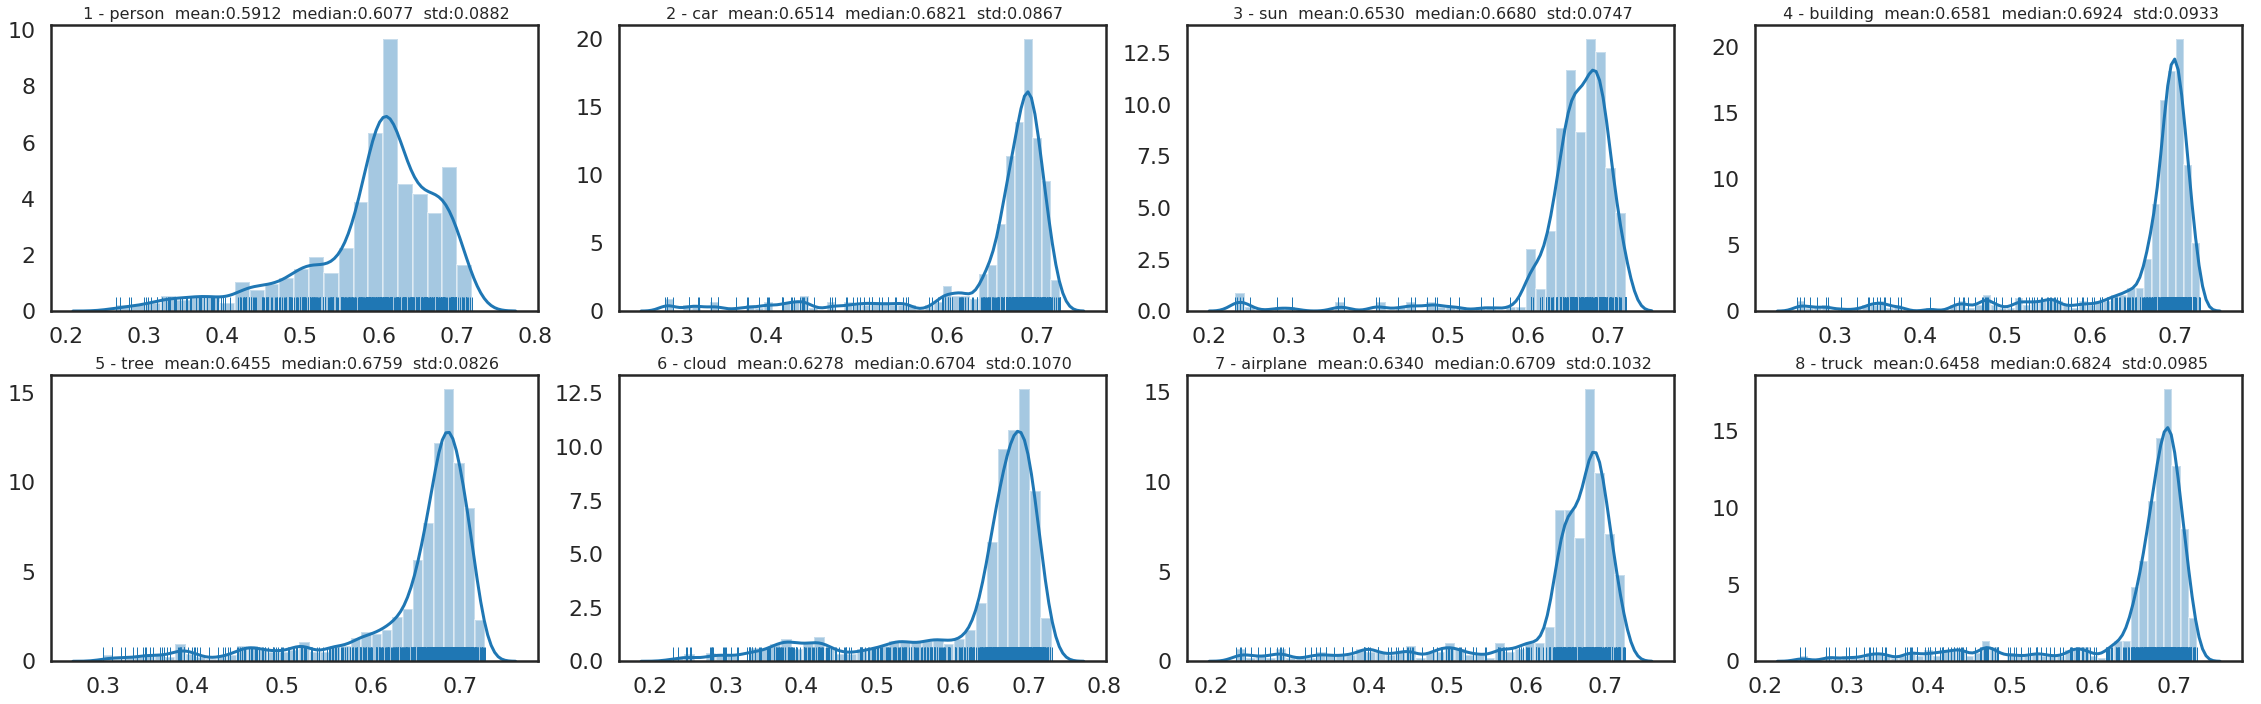

In [17]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_2')

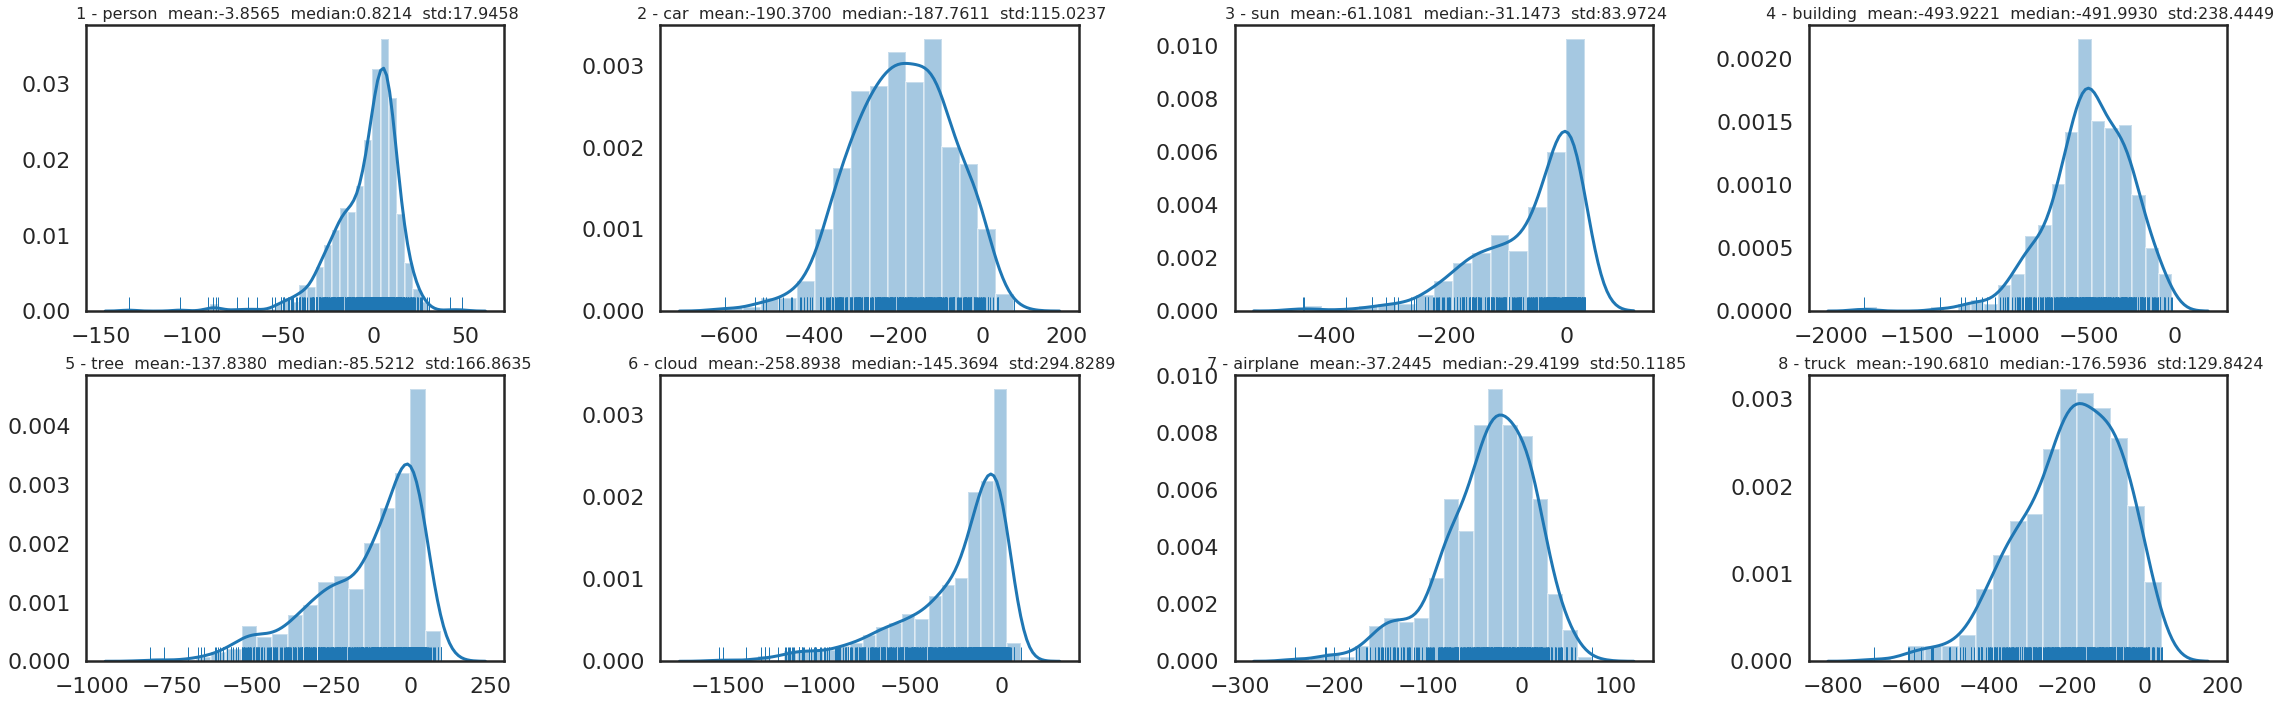

In [57]:
cmap.plot_score_distribution(cls_info, 'fcn_score_0')

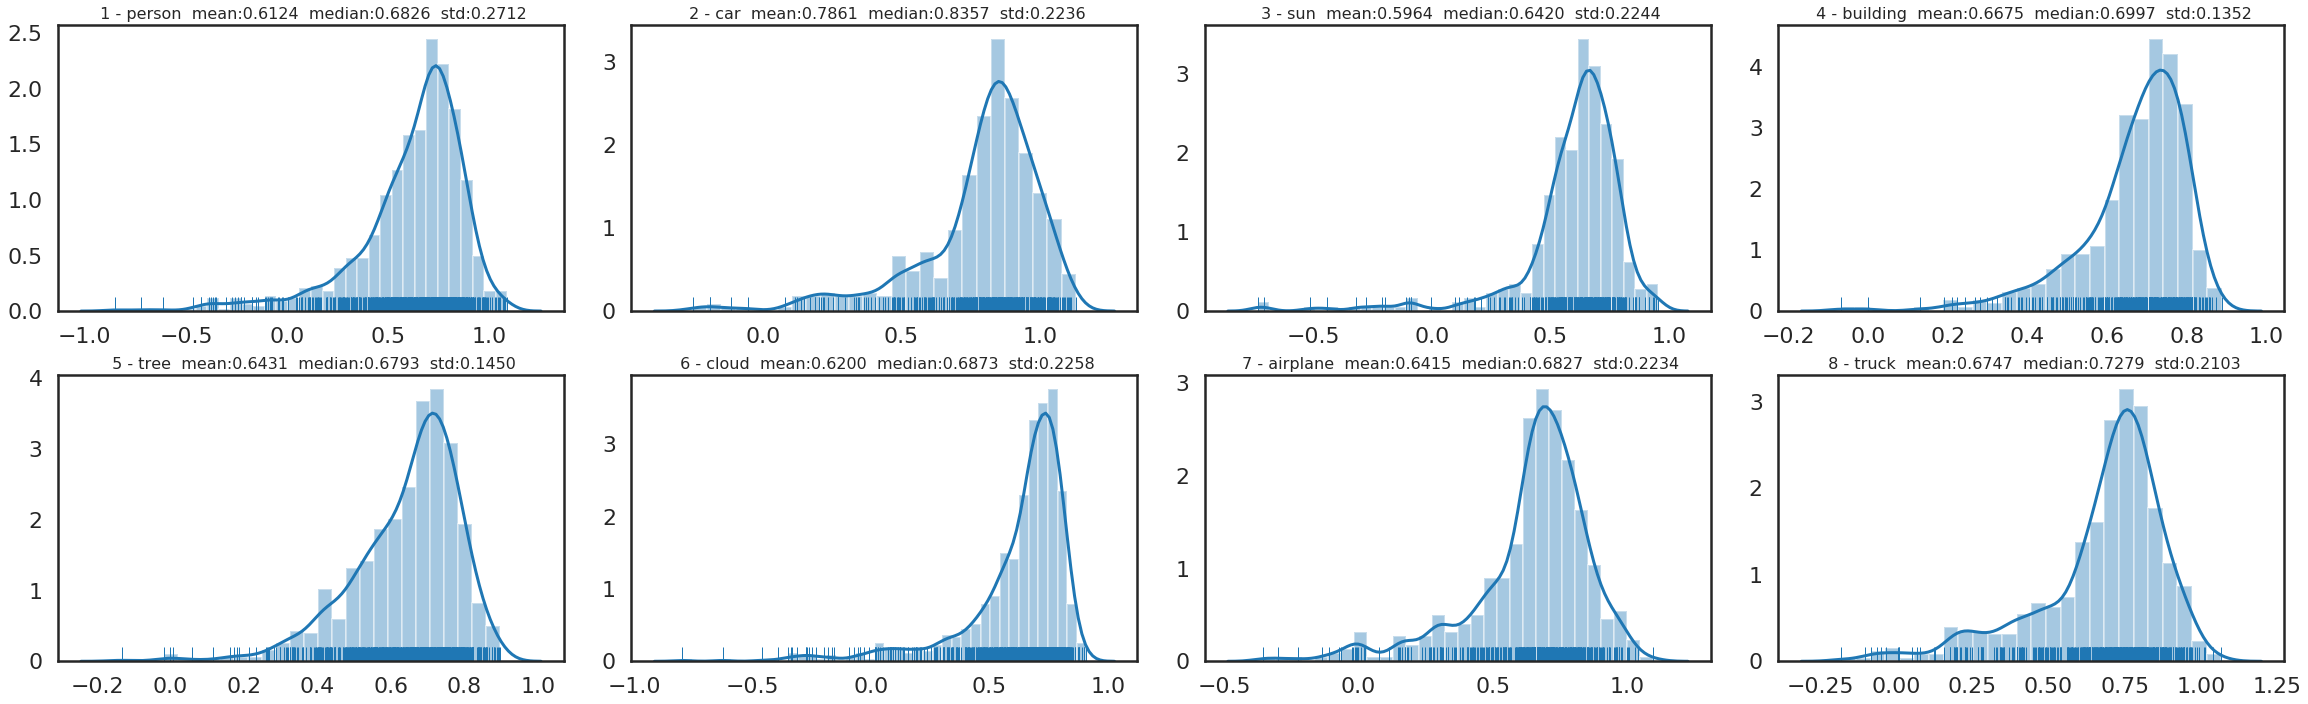

In [58]:
cmap.plot_score_distribution(cls_info, 'fcn_score_1')

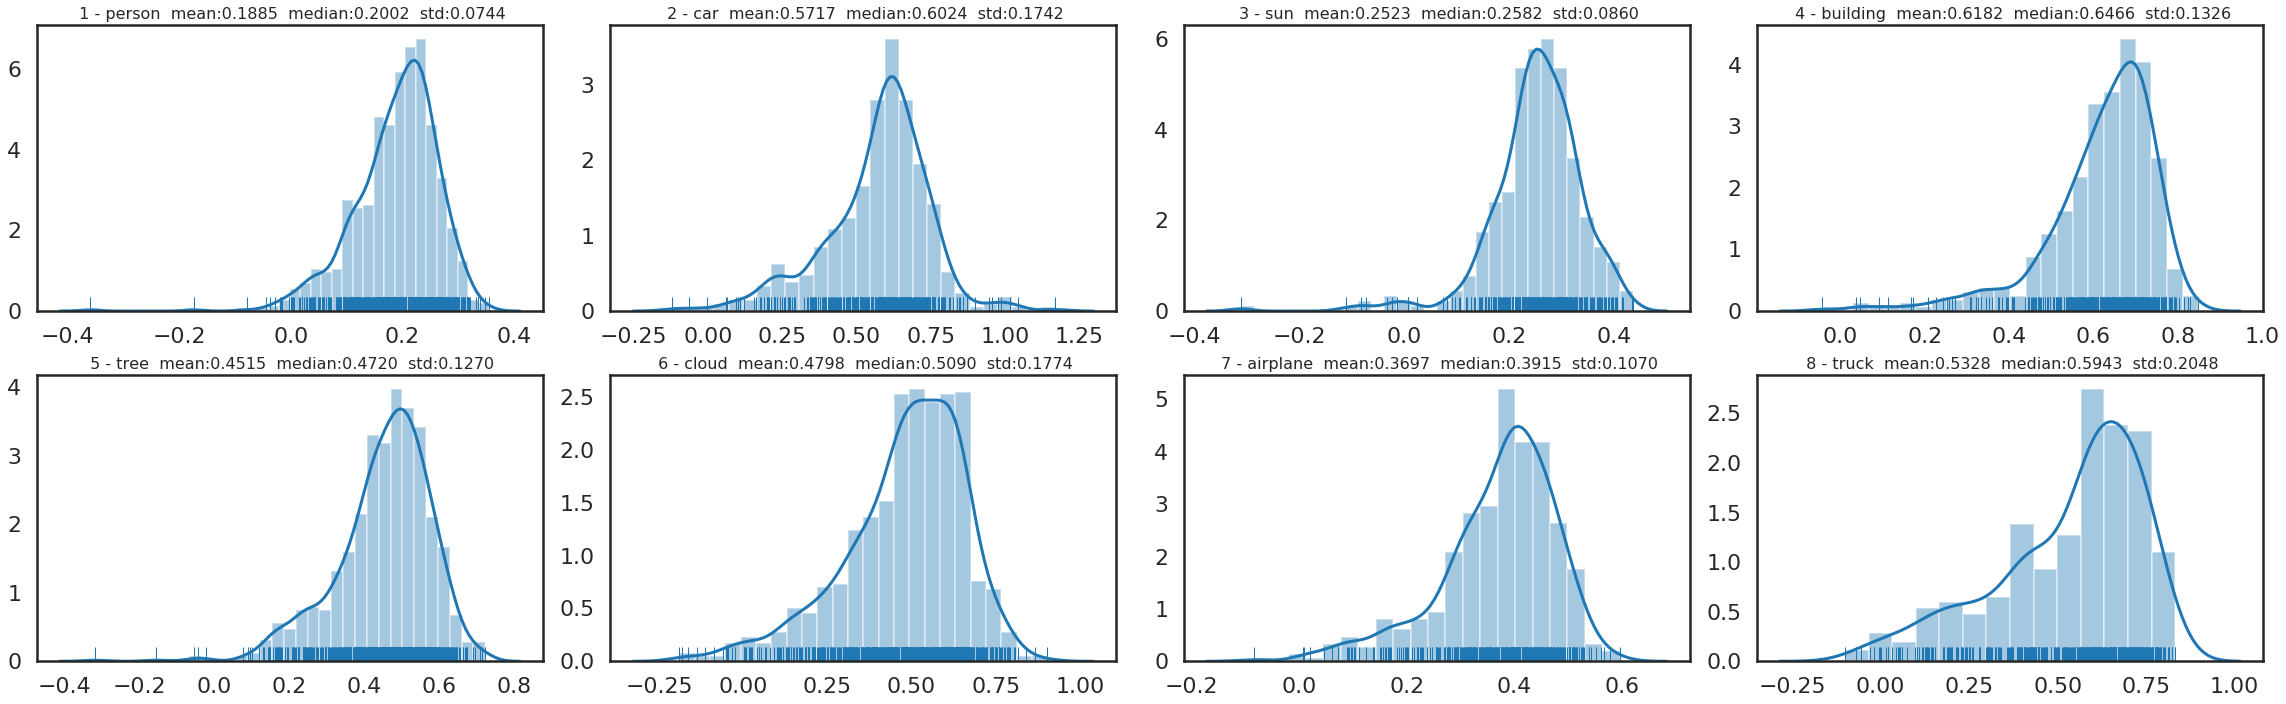

In [33]:
cmap.plot_score_distribution(cls_info, 'fcn_score_1')

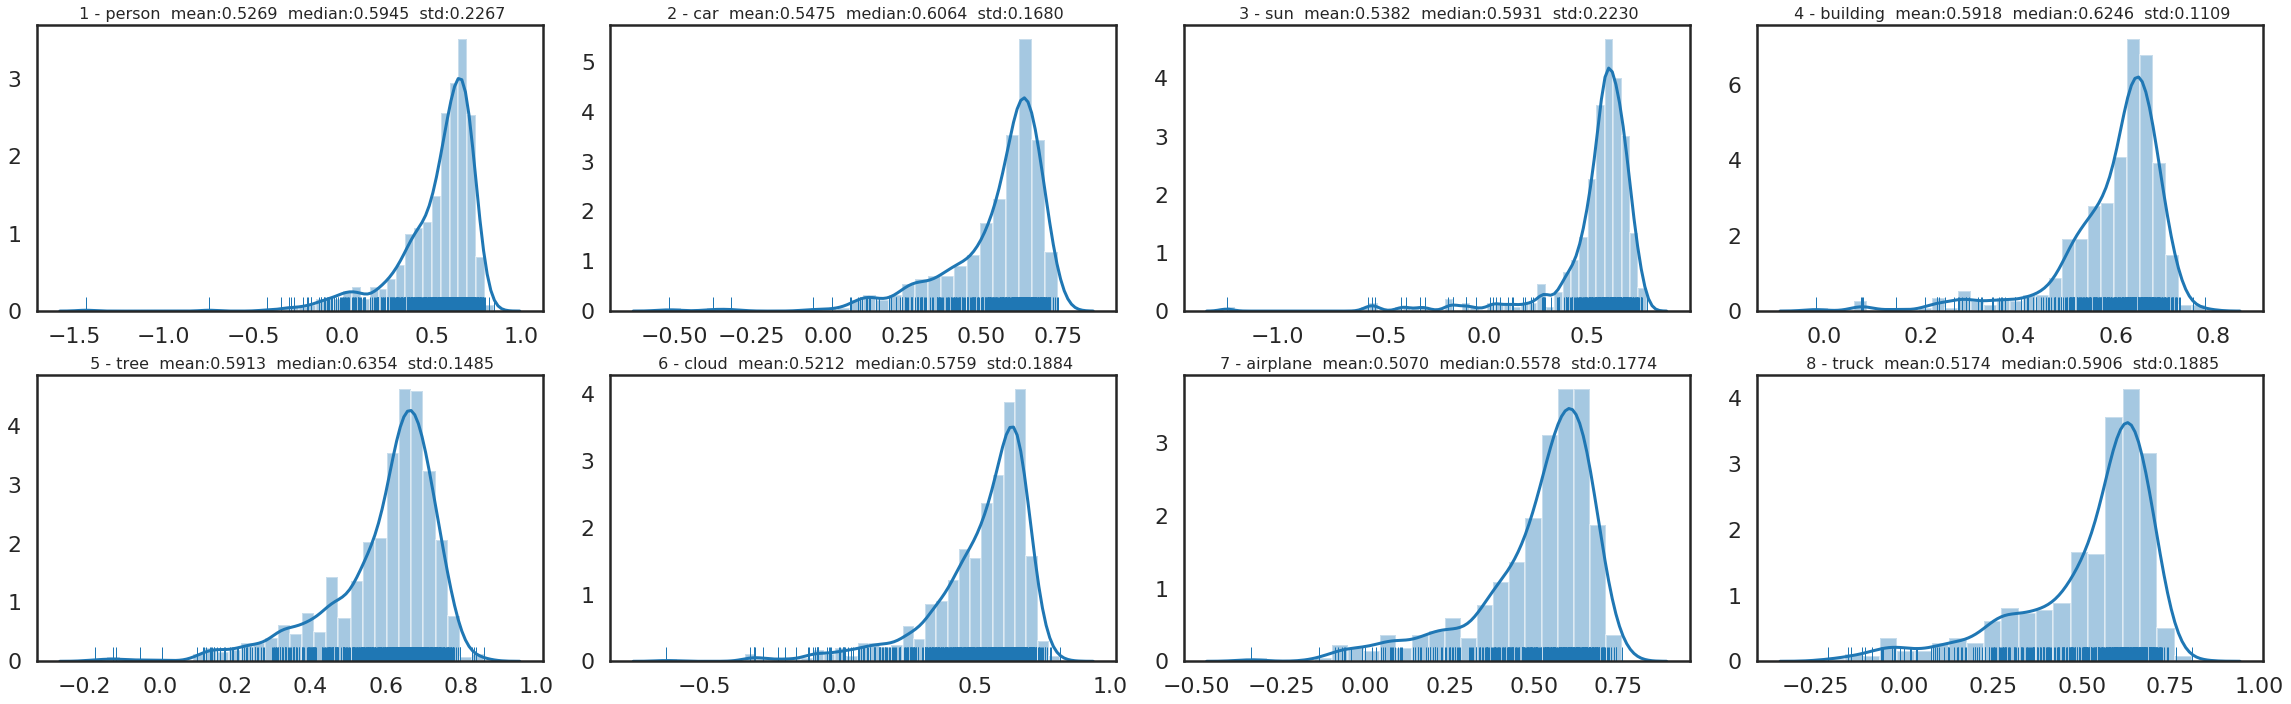

In [51]:
cmap.plot_score_distribution(cls_info, 'fcn_score_2')

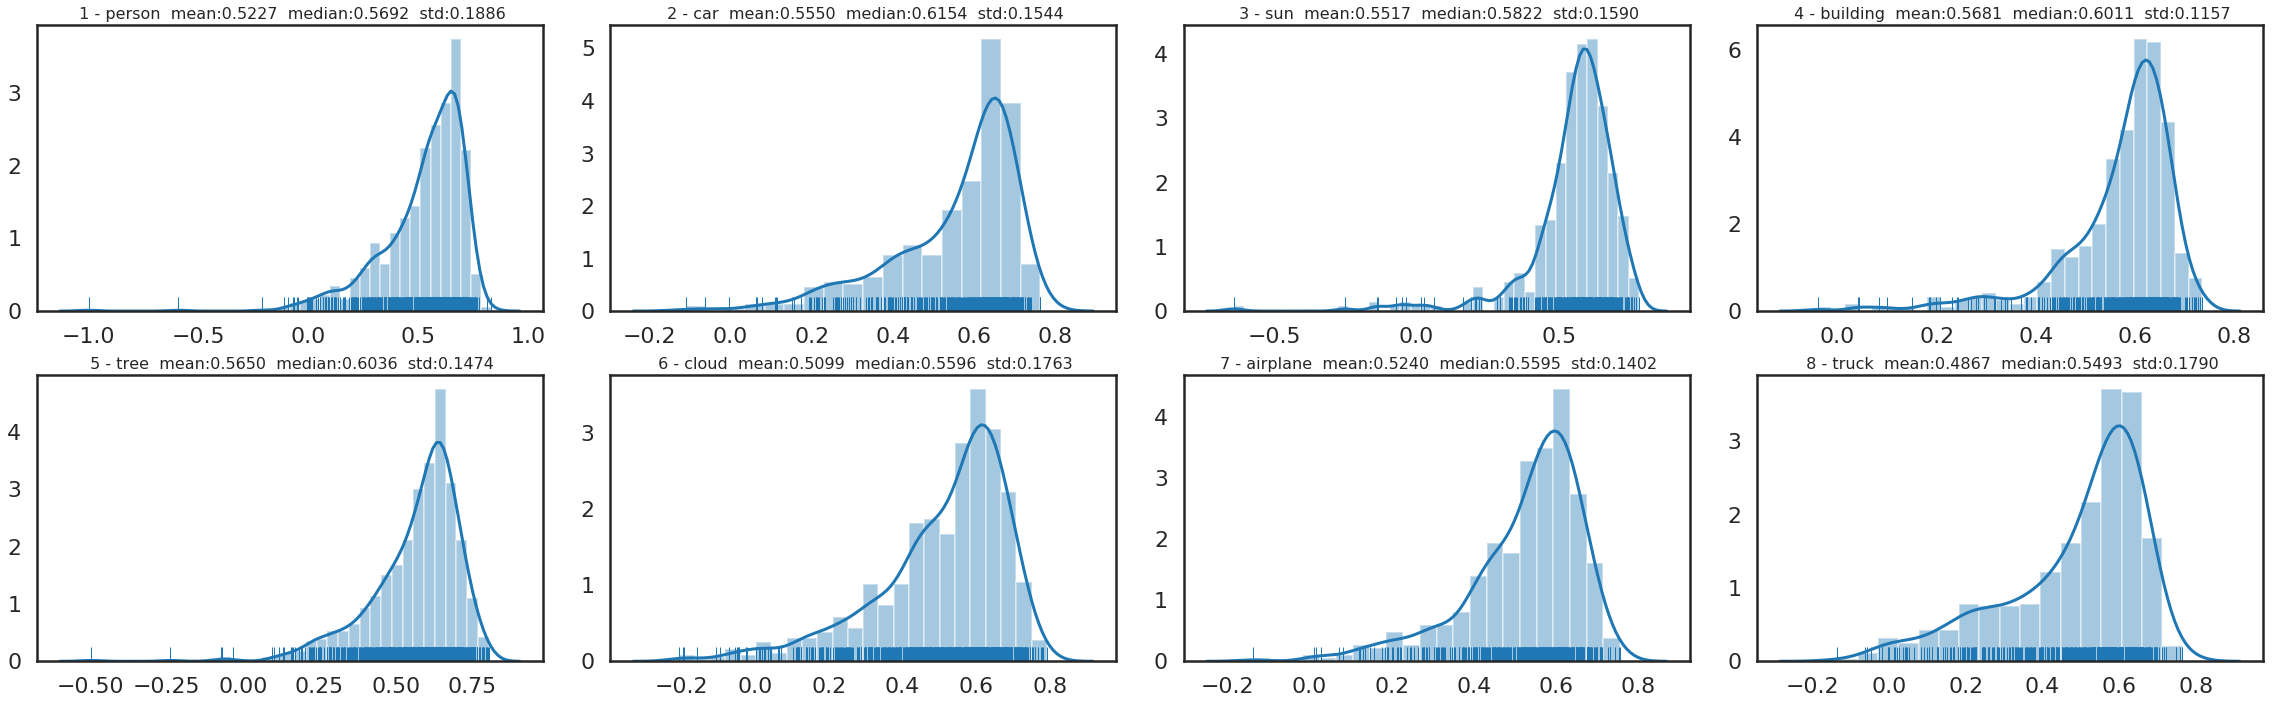

In [32]:
cmap.plot_score_distribution(cls_info, 'fcn_score_2')

#### display of gt_boxes_class, pr_boxes_class

In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 5)
gt_boxes_class, pr_boxes_class = filter_by_class_2(gt_boxes, pr_boxes, class_id= 2)
print(type(gt_boxes_class), type(pr_boxes_class))
pr_keys = list(pr_boxes_class.keys())
gt_keys = list(gt_boxes_class.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
sel_gt_keys = gt_keys[:3]
sel_pr_keys = pr_keys[:3]
# pp.pprint(pr_boxes['newshapes_00002'])
for key in gt_keys[:3]:
    print('-----------------------')
    print('Key: ', key)
    print('-----------------------')
    pp.pprint(pr_boxes_class[key])
    print()
    pp.pprint(gt_boxes_class[key])

In [ ]:

# class_ids     = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# Runs it for one IoU threshold


### Display mAP for one class and one threshold

In [ ]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes_class[cls], pr_boxes_class[cls], iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

### Display mAP one threshold (across all classes)

In [ ]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes, pr_boxes, iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

## Barchart - AP vs. IoU Threshold for various scores 

 Num disp classes 1  Columns:  1  Rows:  1


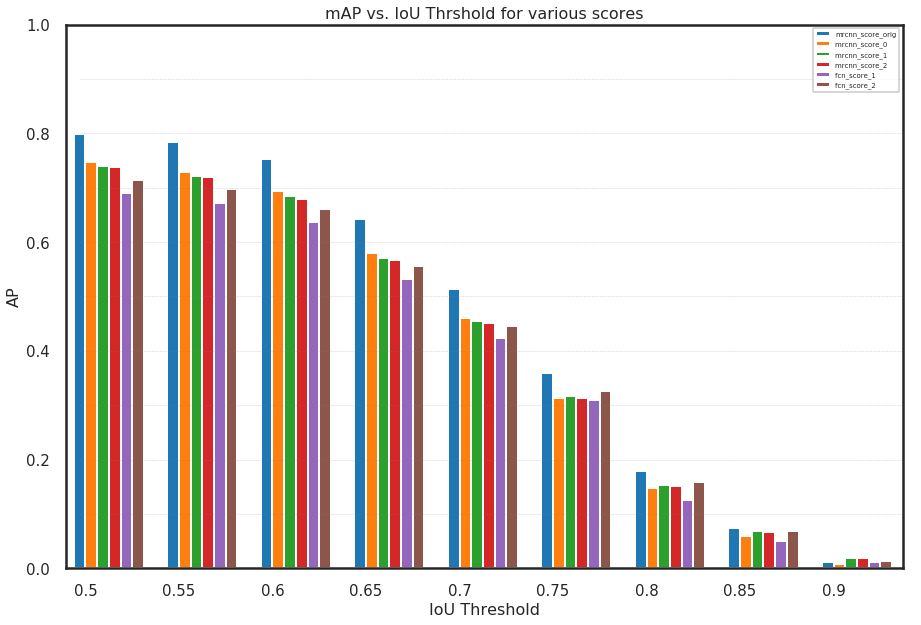


                                                  AP @ IoU Thresholds for computed scores                                                   

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Score -                           0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
mrcnn_score_orig                  0.7980     0.7851     0.7525     0.6428     0.5130     0.3598     0.1797     0.0736     0.0122     %45.74 
mrcnn_score_0                     0.7469     0.7286     0.6946     0.5796     0.4610     0.3130     0.1469     0.0598     0.0082     %41.54 
mrcnn_score_1                     0.7404     0.7225     0.6845     0.5712     0.4550     0.3170     0.1537     0.0688     0.0195     %41.47 
mrcnn_score_2

In [8]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2',  'fcn_score_1', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]
cmap.plot_mAP_vs_IoUs_BarChart(all_data, disp_scores, class_ids= [0])# , disp_ious)

## Barchart mAP vs. Class for different scores `plot_mAP_vs_class()`

loaded : test_map_info_epoch0266_.pkl
Epch: 0266
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


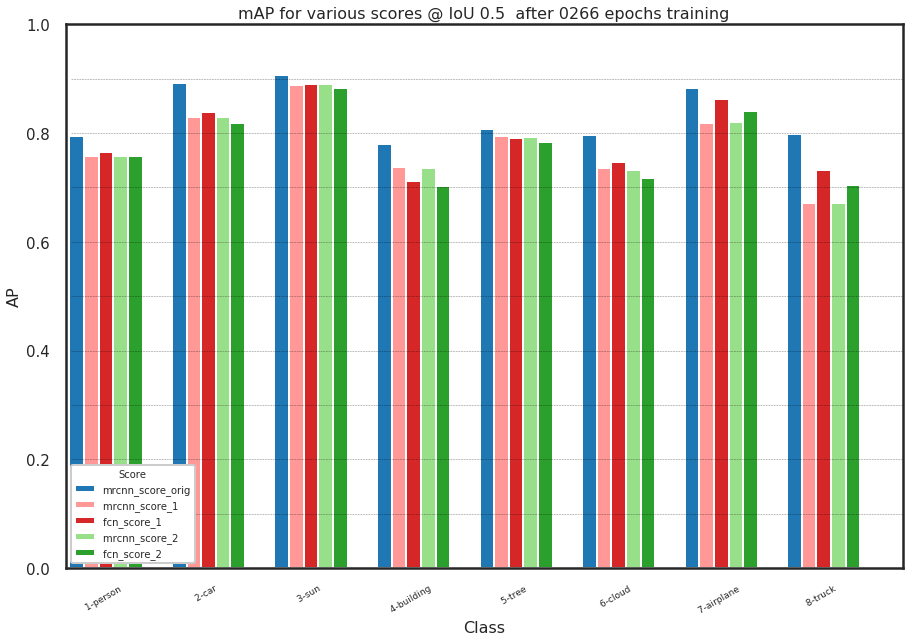


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0266 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.44%            75.83%            75.77% 
 2 - car                           89.16%            82.91%            83.93%            82.91%            81.85% 
 3 - sun                           90.66%            88.83%            89.11%            89.11%            88.23% 
 4 - building                      78.07%            73.72%            71.21%            73.53%            70.32% 
 

In [21]:

# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']

FILE_IDX = 25
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
map_info_file = 'test_map_info_epoch' +epochs+'_.pkl'
with open(os.path.join(MAP_PATH, map_info_file), 'rb') as infile:
    all_data = pickle.load(infile)             
print('loaded :', map_info_file)  
print('Epch:', epochs)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epochs )



# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.75)

Epch: 0266
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


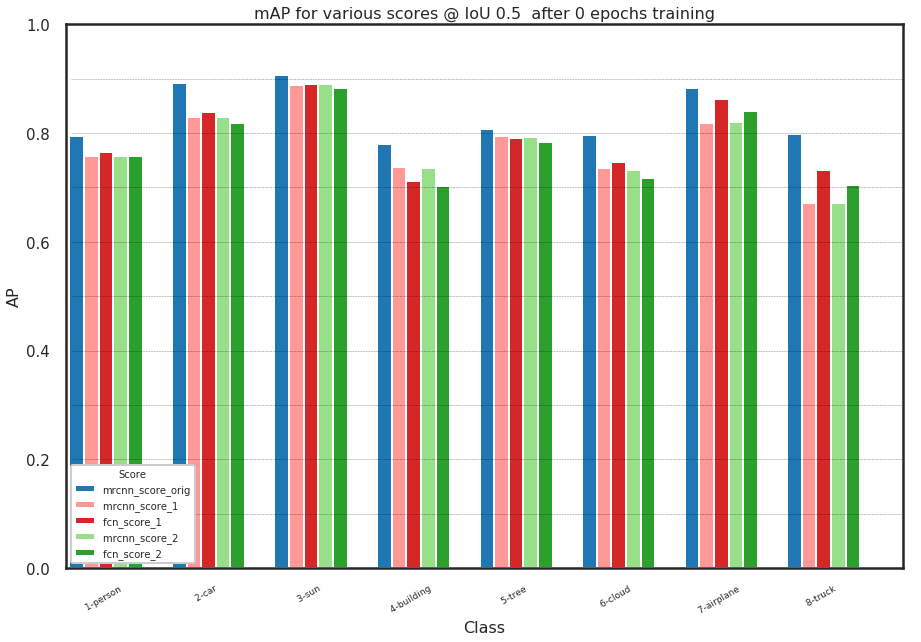


                                         AP @ IoU 0.50 Thresholds for Computed Scores after 0 epochs                                        

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.44%            75.83%            75.77% 
 2 - car                           89.16%            82.91%            83.93%            82.91%            81.85% 
 3 - sun                           90.66%            88.83%            89.11%            89.11%            88.23% 
 4 - building                      78.07%            73.72%            71.21%            73.53%            70.32% 
 

In [33]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' ,'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']
print('Epch:', epochs)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5)



# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.75)

## Plot combined mAP for different IoU thresholds for each score
(one type of score, e.g. 'scores' - all classes combined)

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14 0.9
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14 0.9
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14

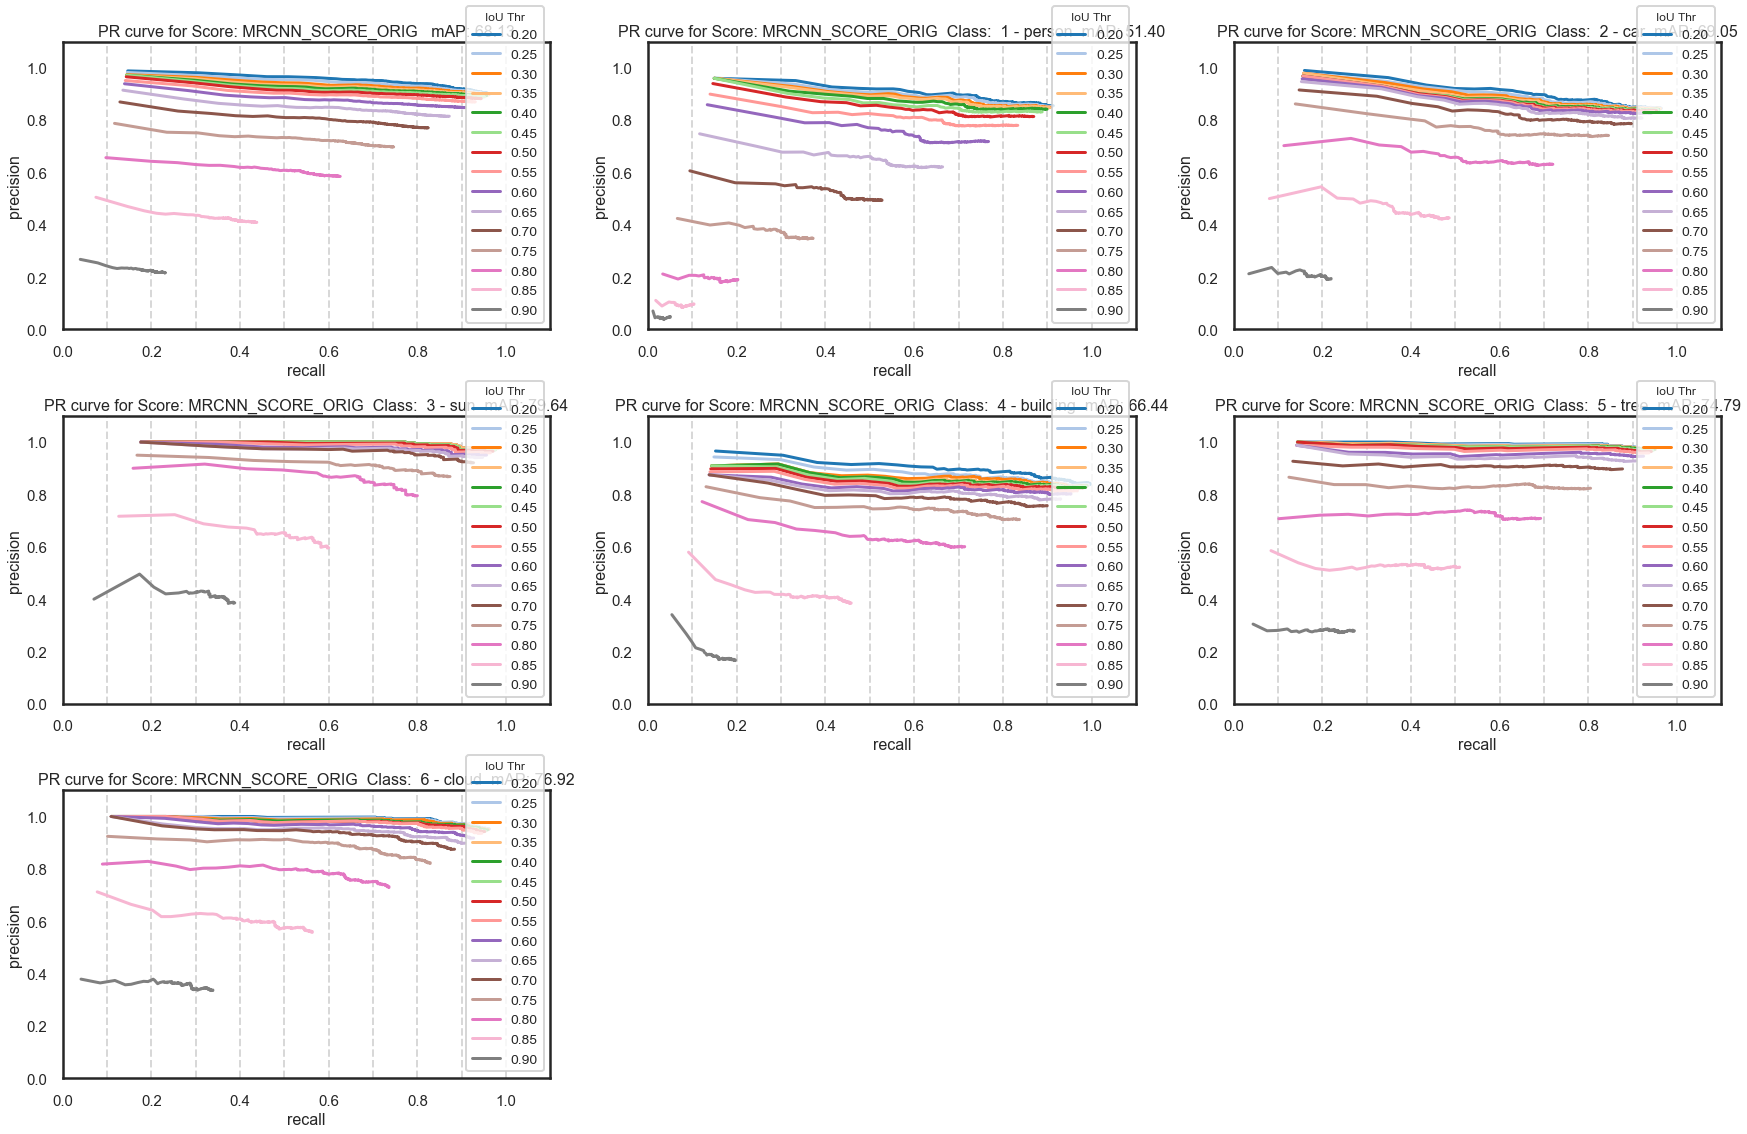

In [18]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig' , class_ids = None , class_names = CLASS_NAMES, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0' , class_ids = 0 , class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_norm' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_0' , class_ids = 0 , class_names = class_names,columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1' , class_ids = 0 , class_names = class_names,columns = 3)

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']
idx/iou_key:  0 0.2
idx/iou_key:  1 0.25
idx/iou_key:  2 0.3
idx/iou_key:  3 0.35
idx/iou_key:  4 0.4
idx/iou_key:  5 0.45
idx/iou_key:  6 0.5
idx/iou_key:  7 0.55
idx/iou_key:  8 0.6
idx/iou_key:  9 0.65
idx/iou_key:  10 0.7
idx/iou_key:  11 0.75
idx/iou_key:  12 0.8
idx/iou_key:  13 0.85
idx/iou_key:  14 0.9

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
----------------------------------------------------------------------------------------------------------------------------------

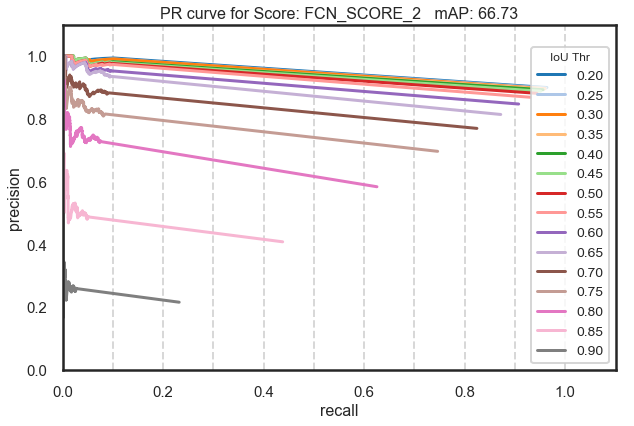

In [20]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2' , class_ids = 0 , class_names = CLASS_NAMES,columns = 2)

## Plot combined mAP info for different scores (at a given IoU threshold, all classes combined)

col/rows:  1 1

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        79.81%            74.02%            76.59%
------------------------------------------------------------------------------------------------------------------------------------------------------


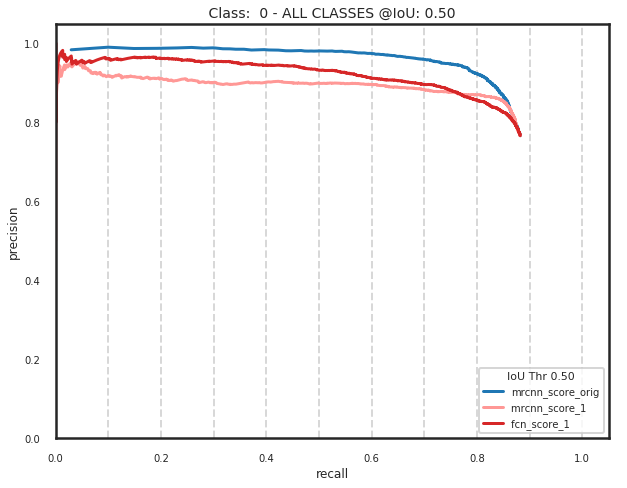

col/rows:  1 1

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        79.81%            73.79%            74.70%
------------------------------------------------------------------------------------------------------------------------------------------------------


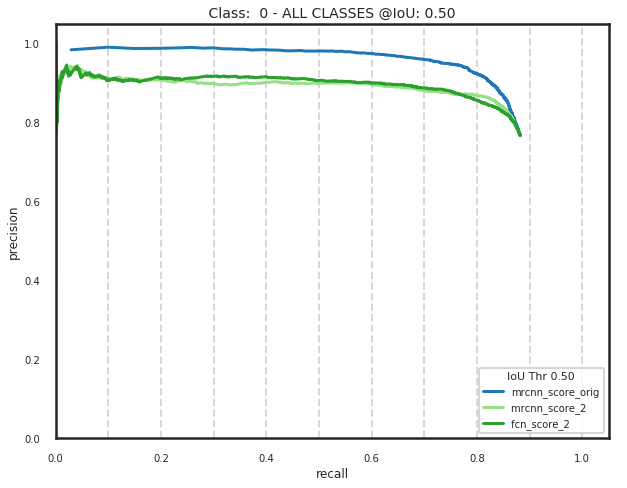

In [26]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2' ,'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_1',  'fcn_score_1']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = CLASS_NAMES,iou = 0.50)
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_2' , 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = CLASS_NAMES,iou = 0.50)

col/rows:  1 1

                                                     AP @ IoU 0.75 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        35.96%            31.66%            34.47%
------------------------------------------------------------------------------------------------------------------------------------------------------


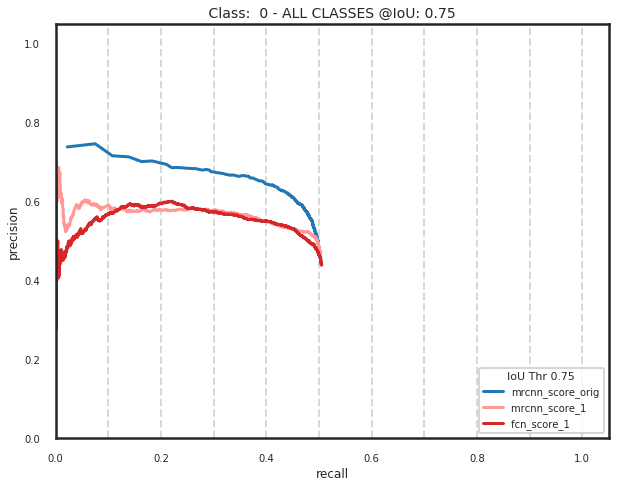

col/rows:  1 1

                                                     AP @ IoU 0.75 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        35.96%            31.11%            29.12%
------------------------------------------------------------------------------------------------------------------------------------------------------


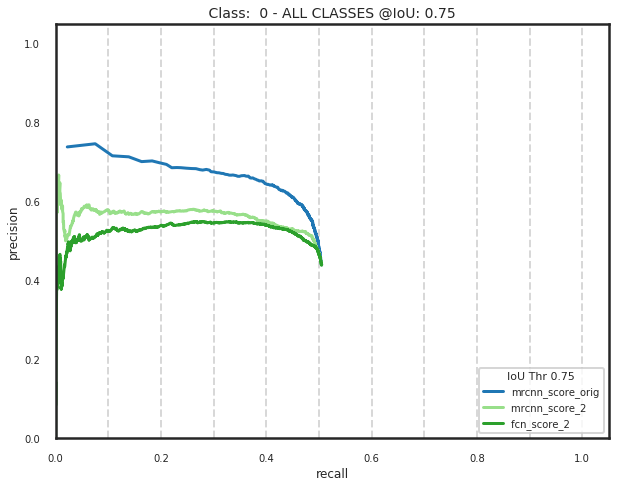

In [27]:
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_1',  'fcn_score_1']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = CLASS_NAMES,iou = 0.75)
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_2' , 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = CLASS_NAMES,iou = 0.75)

## Indvidual classes - Plot mAP info for  at different thresholds (one type of score, e.g. 'scores')

### Plot mAP for `mrcnn_score_orig`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.8129     0.8129     0.8113     0.8104     0.8089     0.8046     0.7949     0.7795     0.6757     0.5514     0.4074     0.2931     0.1791     0.0986     0.0376      %57.86 
  2 - car                         0.9034     0.9034     0.9034     0.903

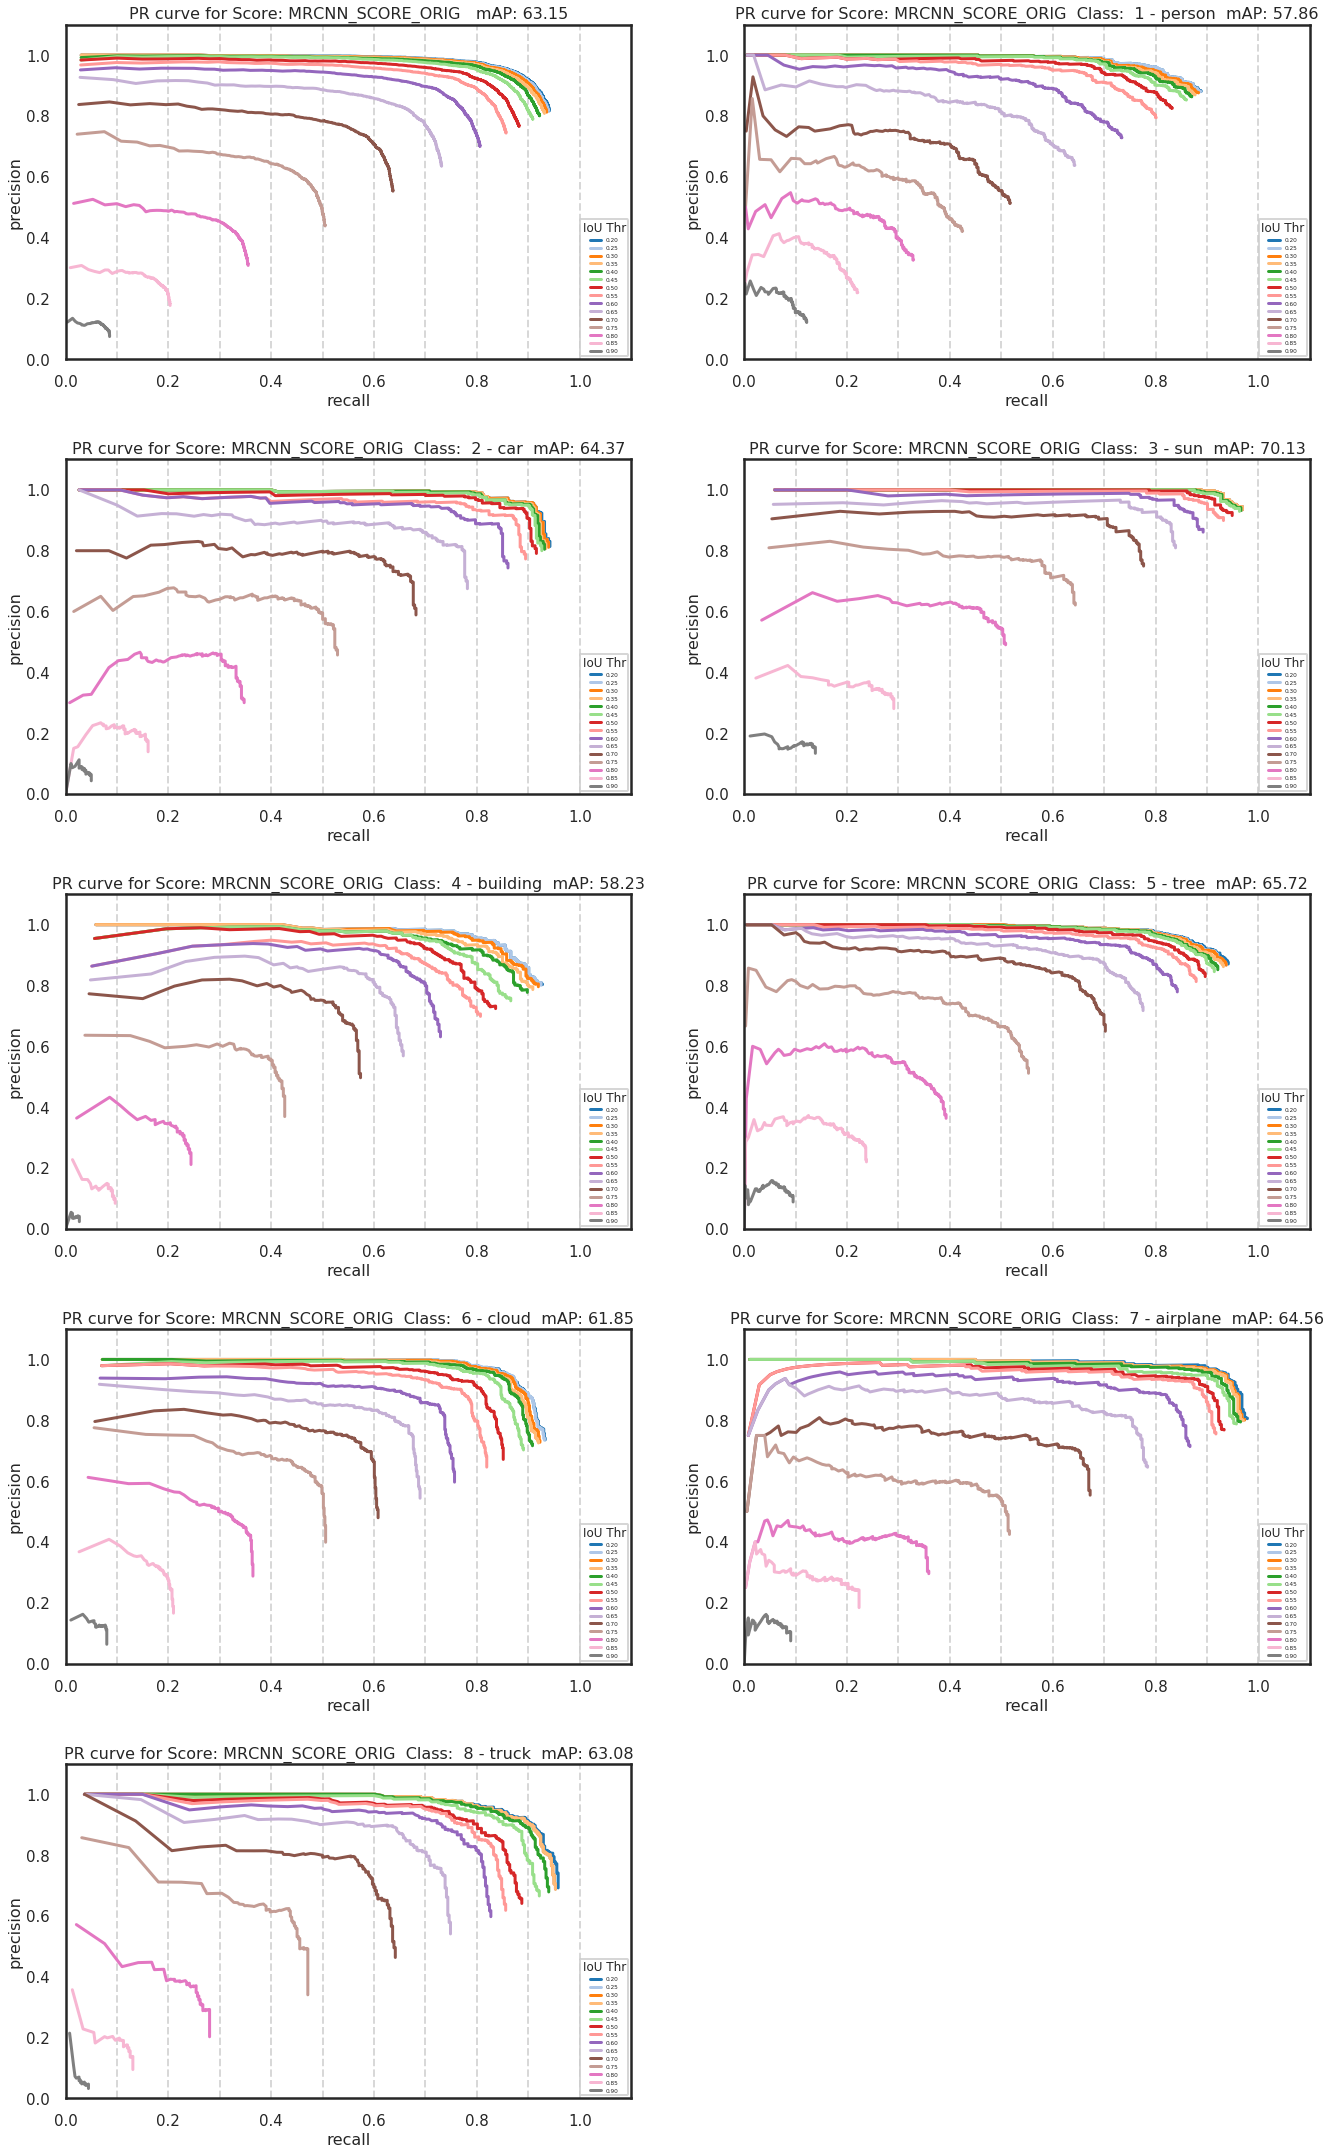

In [37]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig', class_names = CLASS_NAMES , columns =2)

### Plot mAP for `mrcnn_score_norm`

In [ ]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_norm')

### Plot mAP for `mrcnn_score_0`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0', class_names = class_names )

### Plot mAP for `mrcnn_score_1`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_1                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.8003     0.8003     0.7942     0.7894     0.7865     0.7783     0.7584     0.7335     0.6091     0.4938     0.3514     0.2721     0.1866     0.1096     0.0588      %55.48 
  2 - car                         0.8409     0.8409     0.8409     0.840

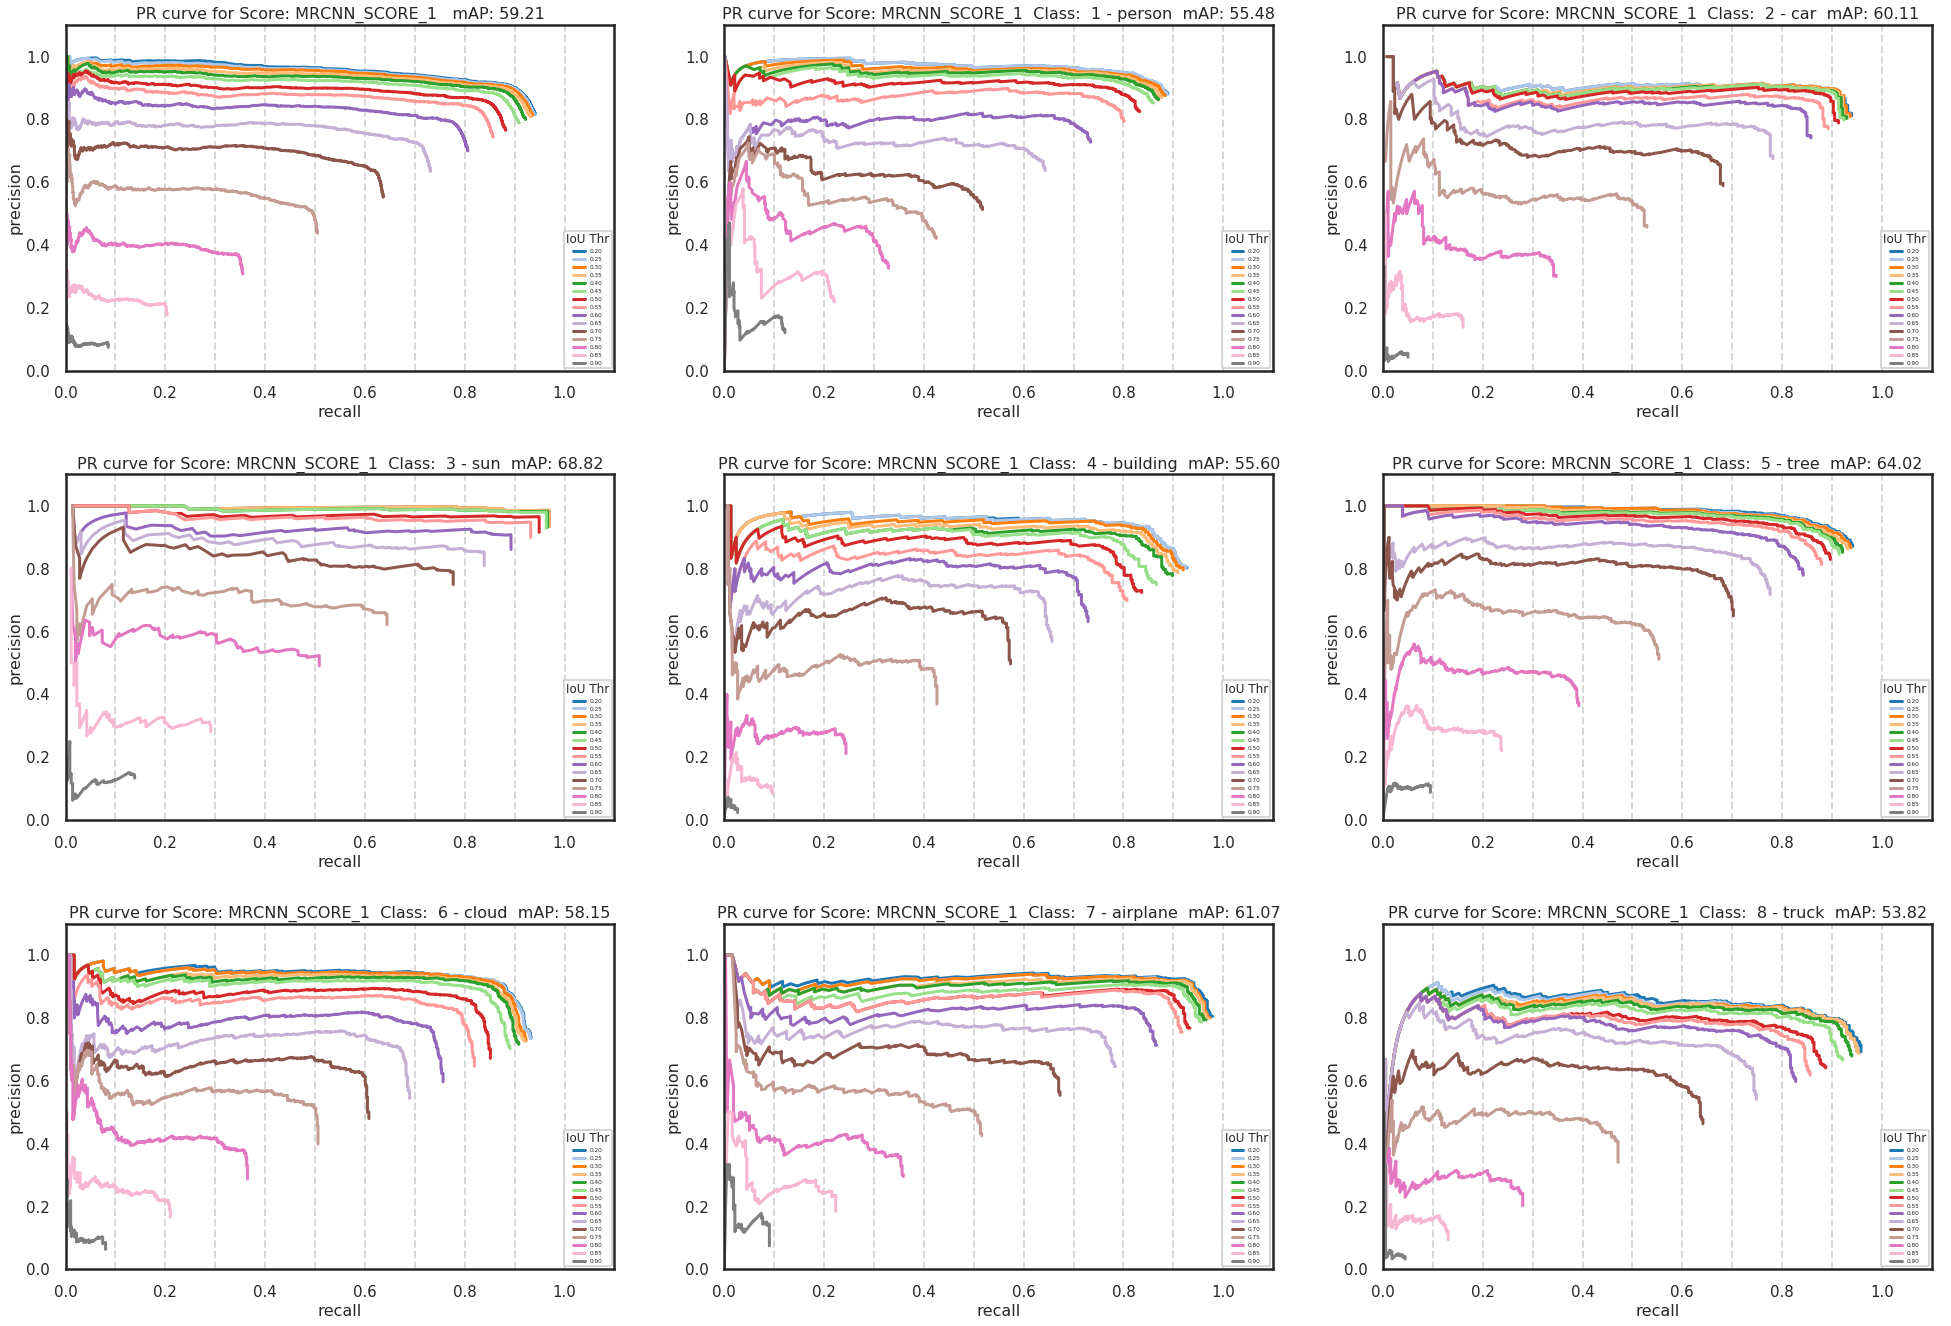

In [40]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1', class_names = CLASS_NAMES )

### Plot mAP for `mrcnn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_2                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.8004     0.8004     0.7936     0.7895     0.7836     0.7759     0.7583     0.7329     0.6116     0.4949     0.3481     0.2613     0.1753     0.0996     0.0485      %55.16 
  2 - car                         0.8410     0.8410     0.8410     0.840

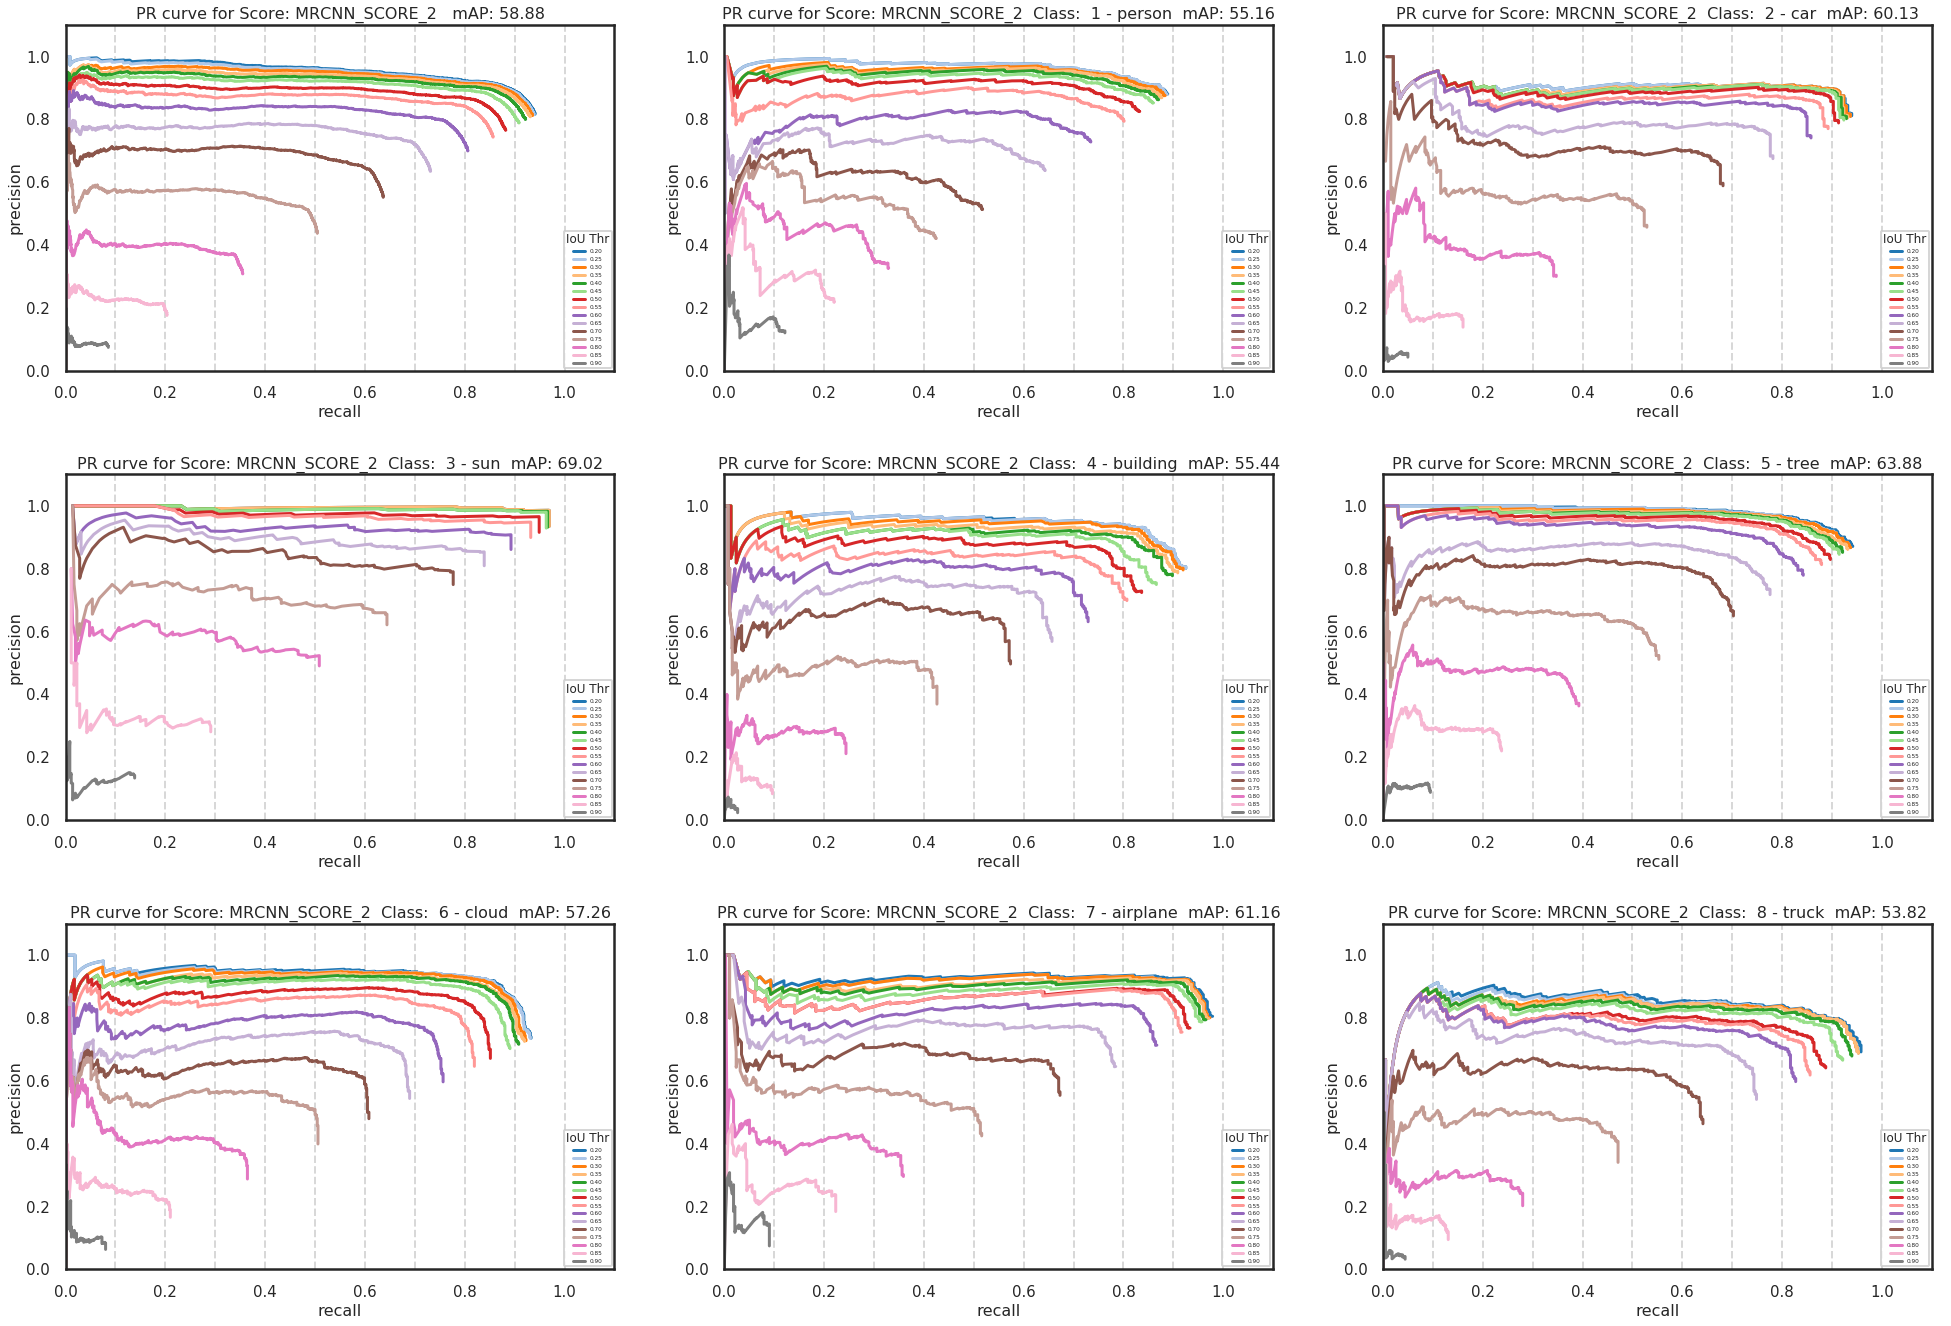

In [41]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2', class_names = CLASS_NAMES )

### Plot mAP for `fcn_score_1`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_1                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.7938     0.7929     0.7919     0.7856     0.7821     0.7758     0.7558     0.7379     0.6191     0.5080     0.3730     0.2819     0.2097     0.1459     0.1043      %56.38 
  2 - car                         0.8492     0.8491     0.8491     0.846

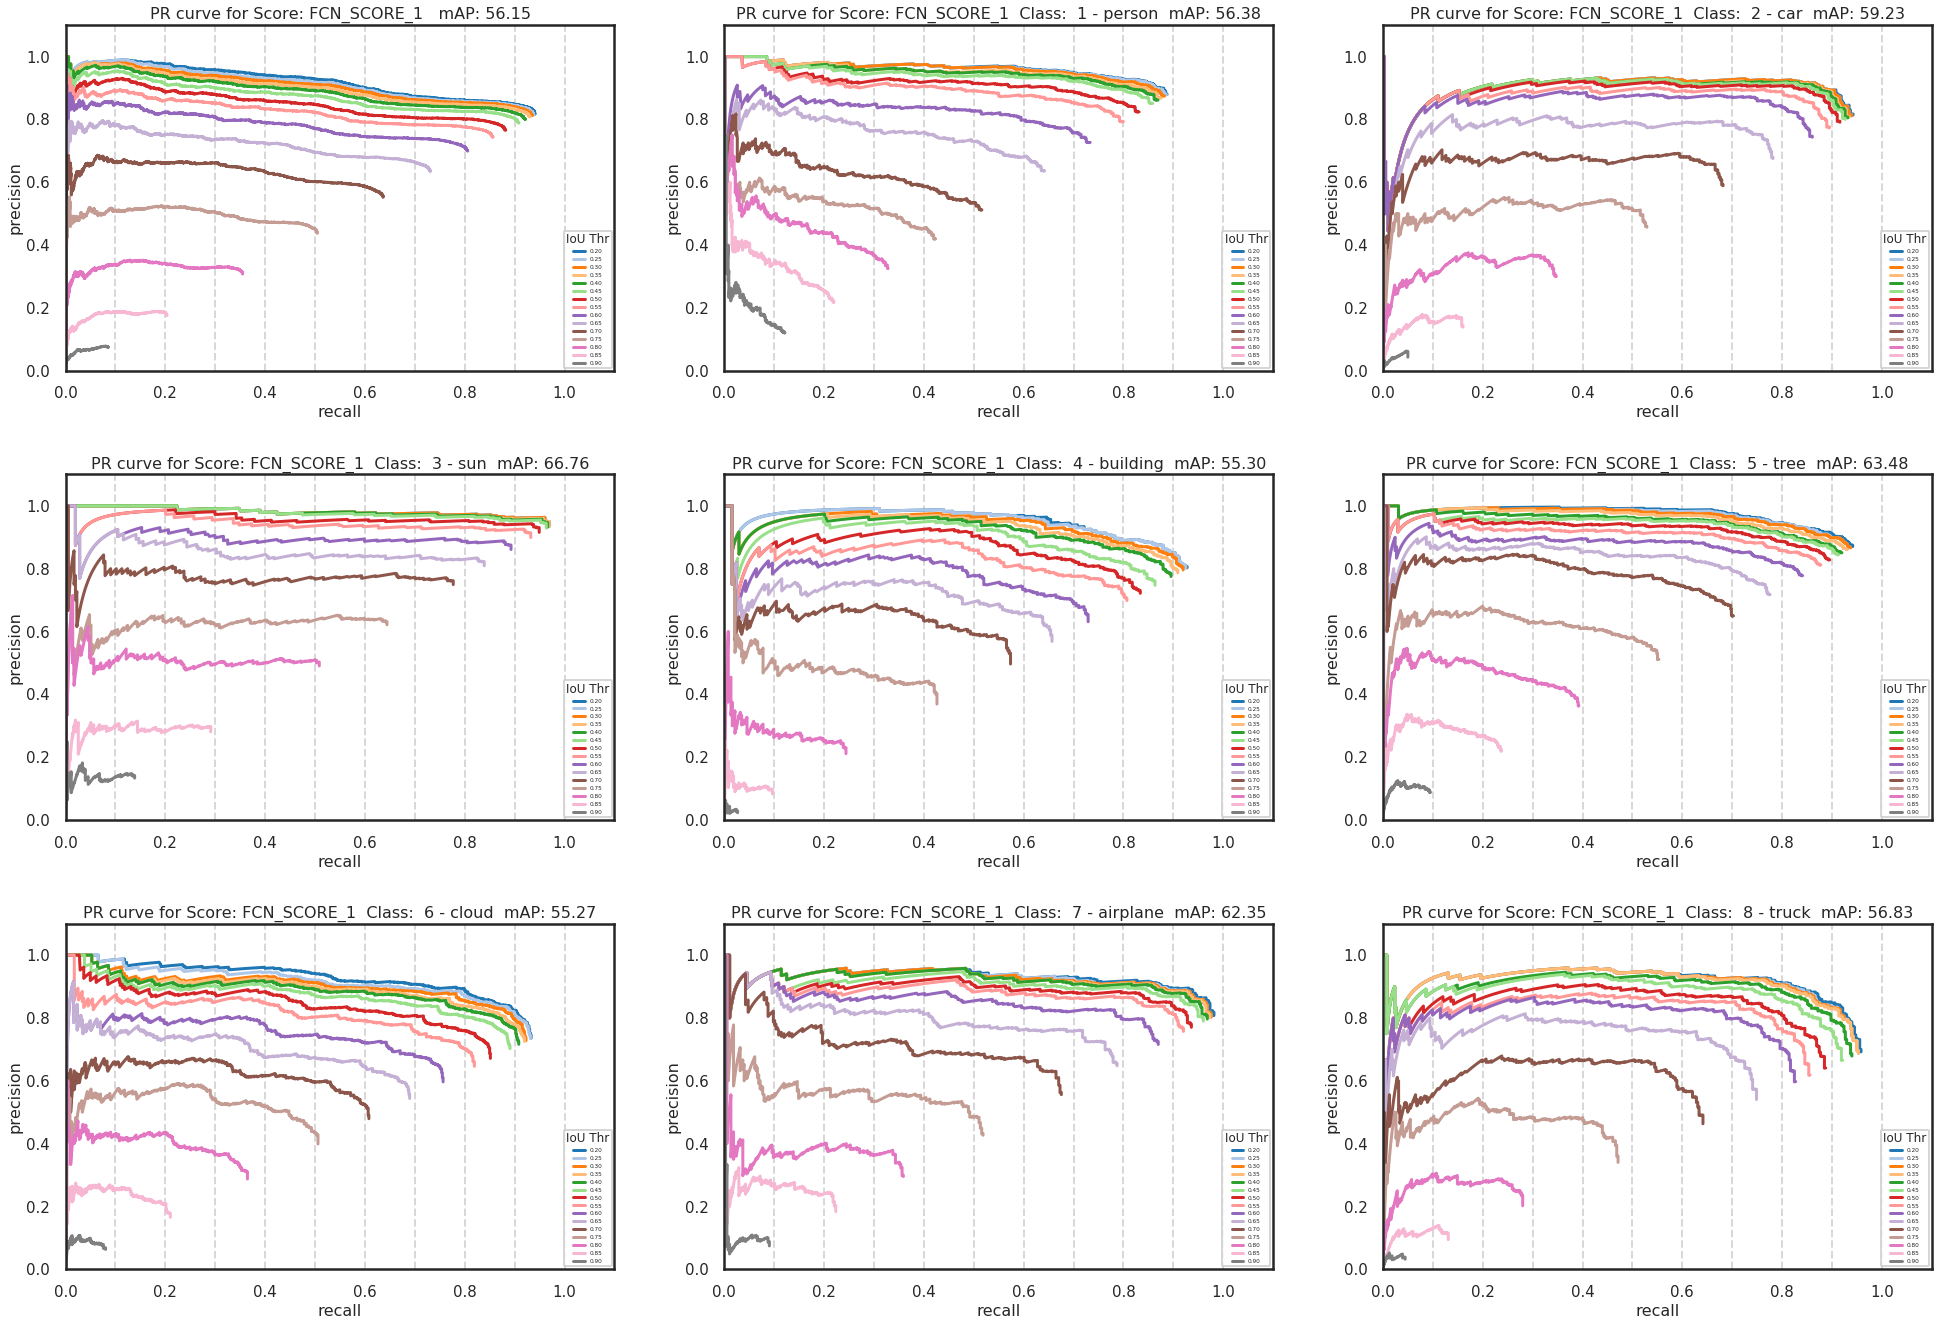

In [42]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1', class_names = CLASS_NAMES )

### Plot mAP for `fcn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.2000     0.2500     0.3000     0.3500     0.4000     0.4500     0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.7894     0.7889     0.7872     0.7785     0.7751     0.7680     0.7468     0.7212     0.5929     0.4664     0.3173     0.2277     0.1513     0.0804     0.0288      %53.47 
  2 - car                         0.8558     0.8558     0.8558     0.852

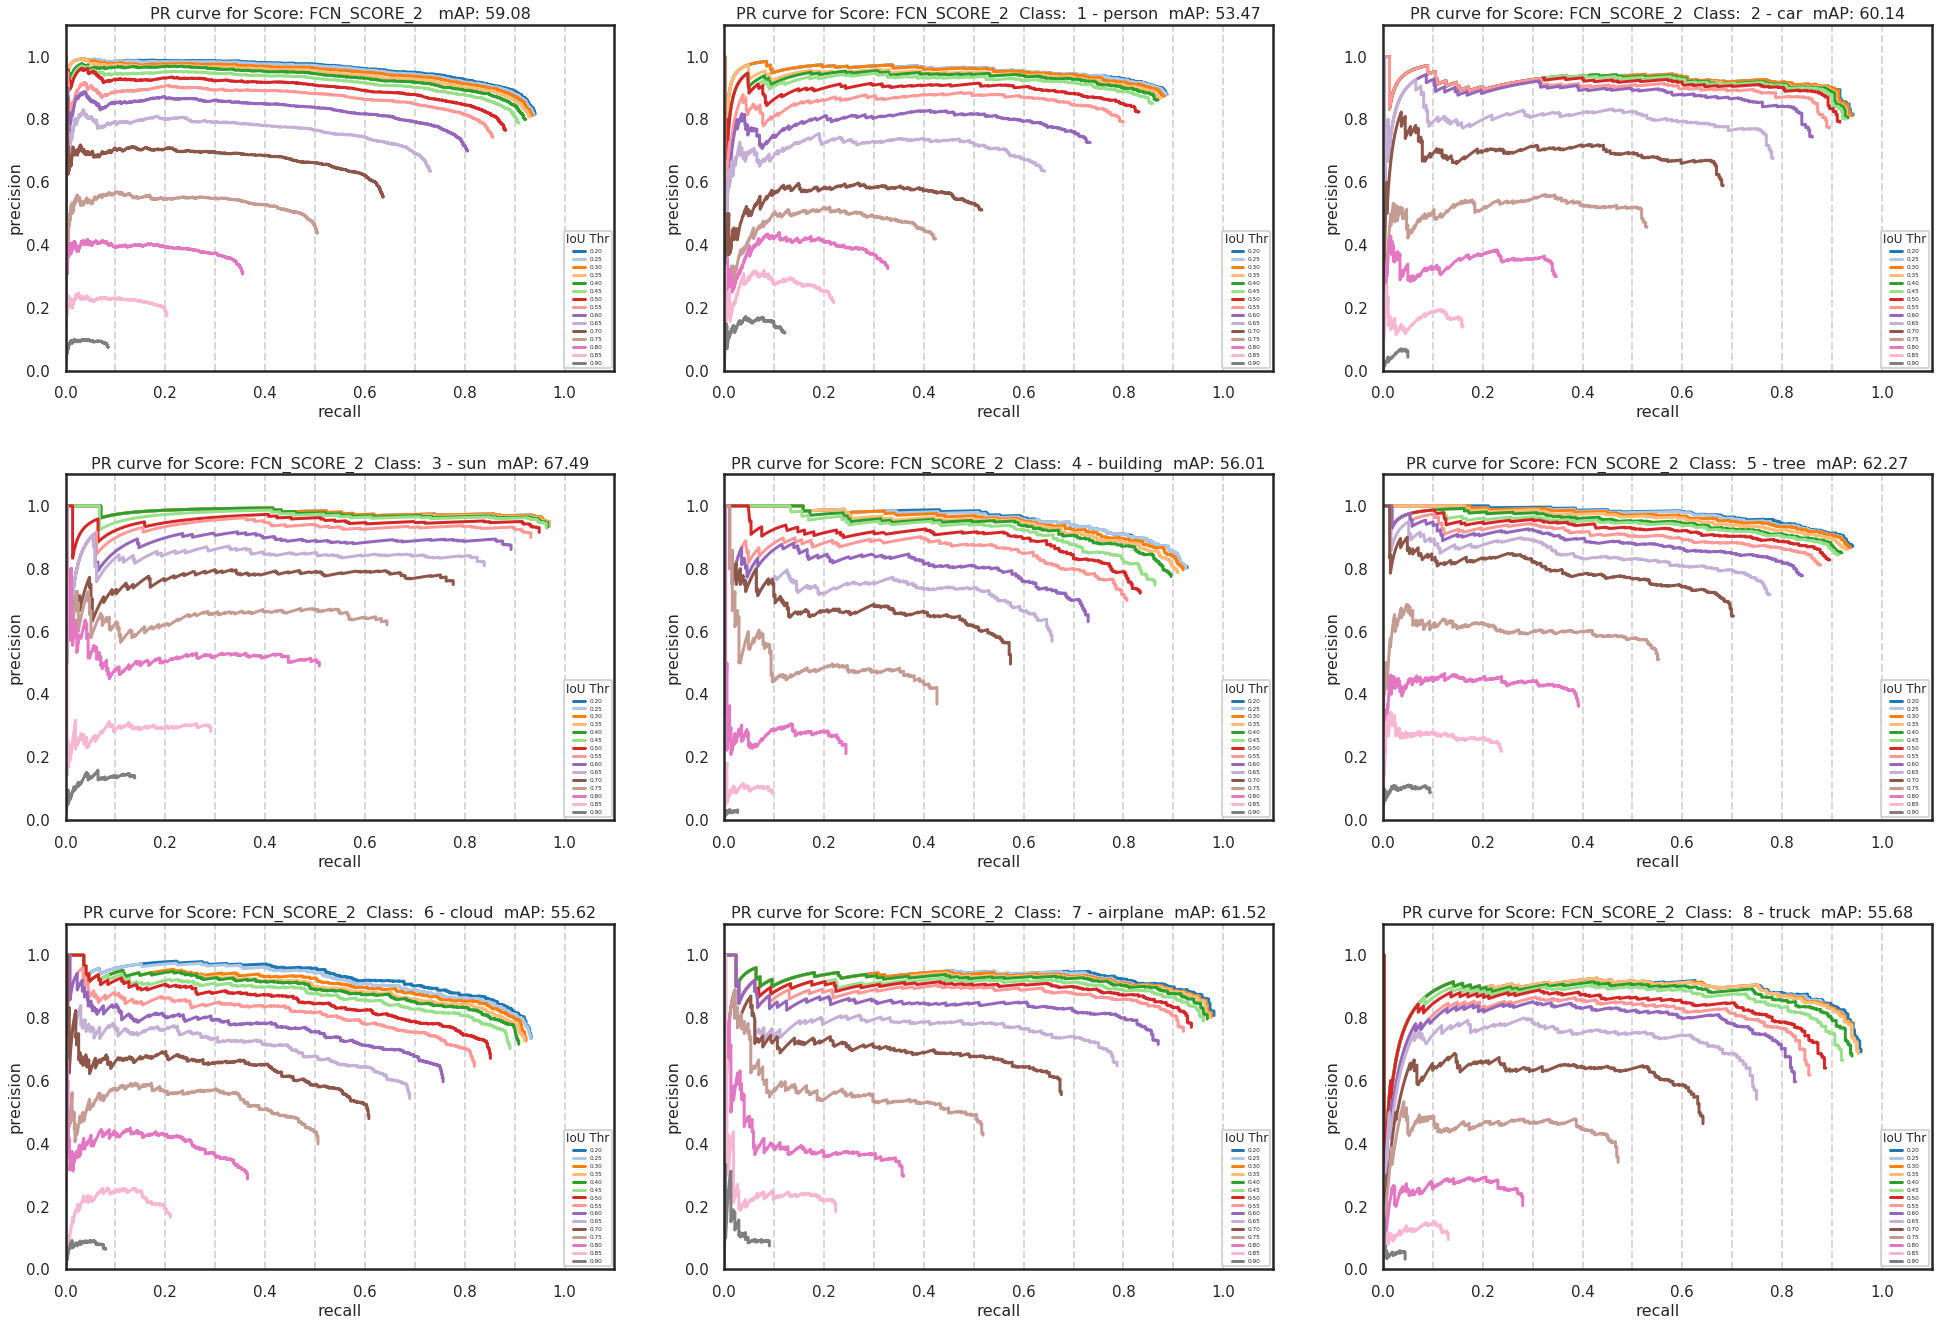

In [43]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2', class_names = CLASS_NAMES )

## Indvidual classes - Plot mAP info for different scores (at a given IoU threshold)

### IoU = 0.5

Epch: 0266
col/rows:  2 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.44% 
 2 - car                           89.16%            82.91%            83.93% 
 3 - sun                           90.66%            88.83%            89.11% 
 4 - building                      78.07%            73.72%            71.21% 
 5 - tree                          80.83%            79.55%            79.16% 
 6 - cloud                         79.60%     

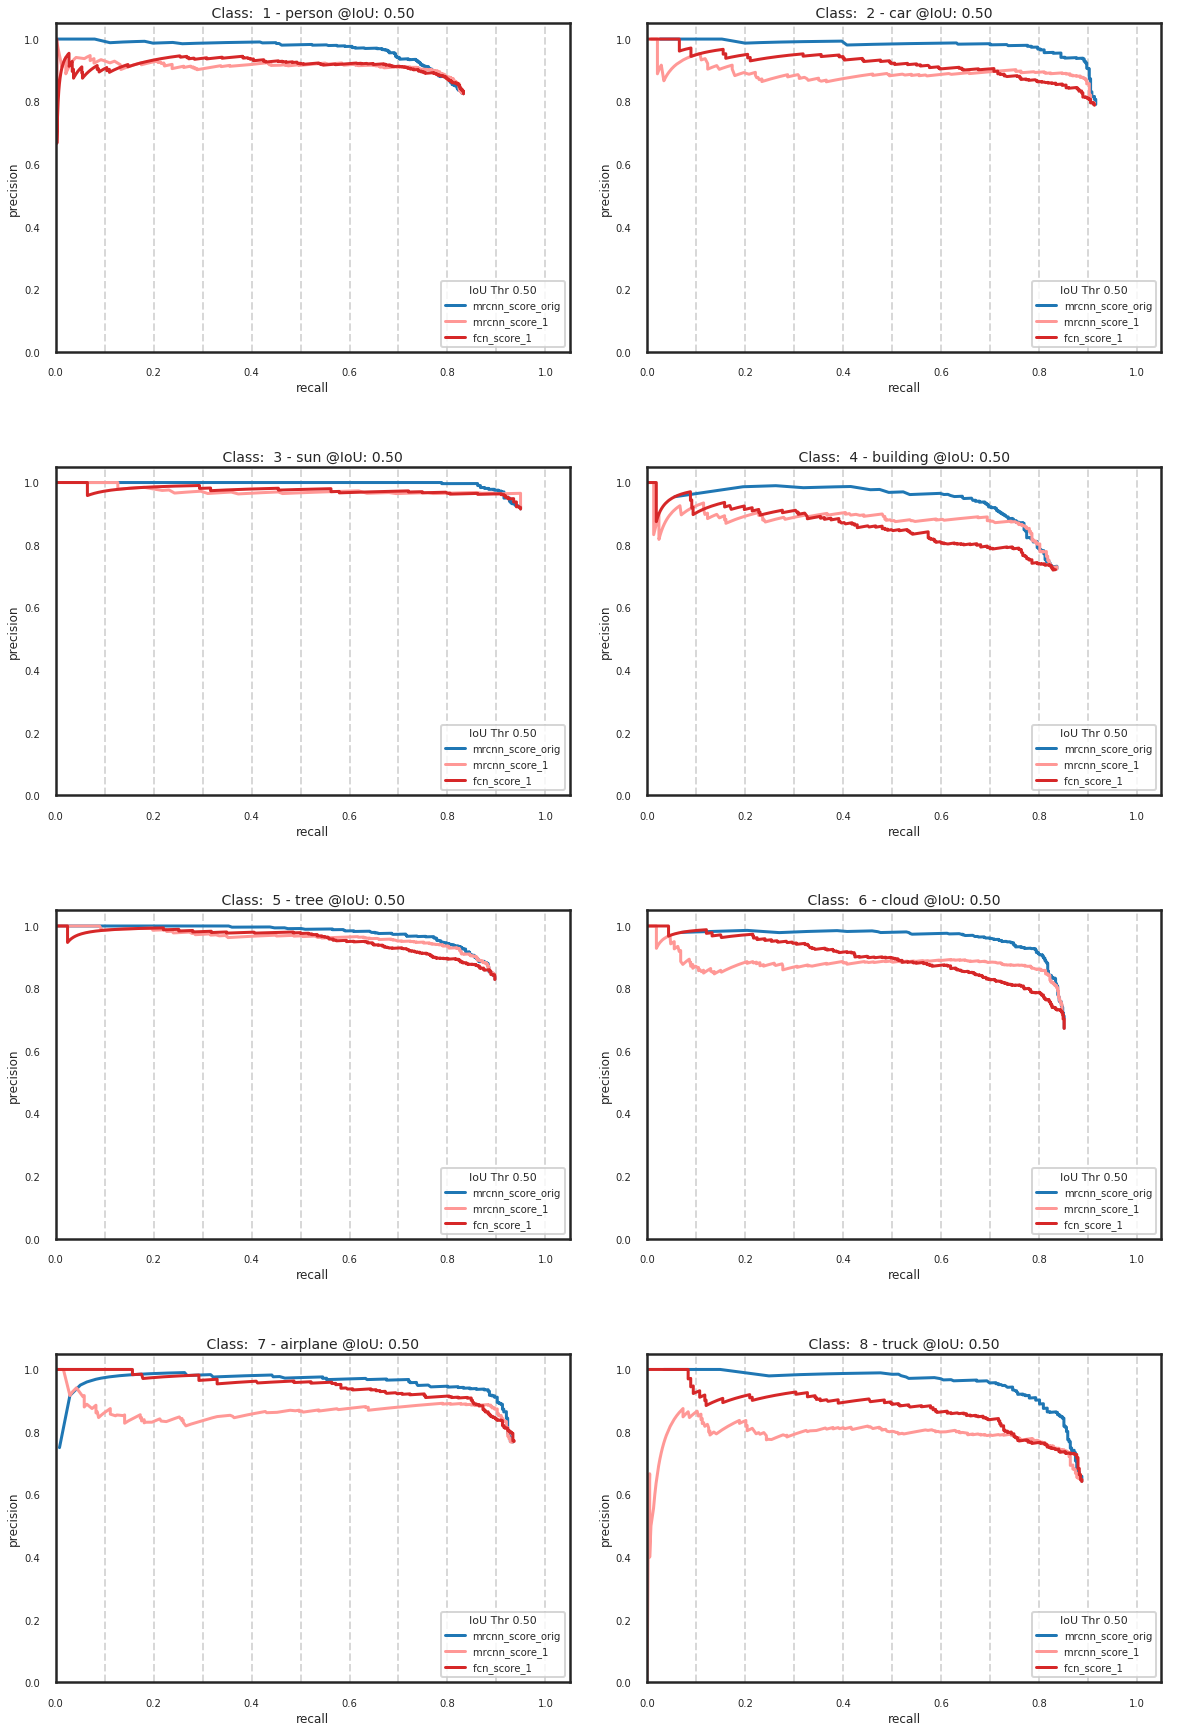

col/rows:  2 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.83%            75.77% 
 2 - car                           89.16%            82.91%            81.85% 
 3 - sun                           90.66%            89.11%            88.23% 
 4 - building                      78.07%            73.53%            70.32% 
 5 - tree                          80.83%            79.38%            78.33% 
 6 - cloud                         79.60%            73.1

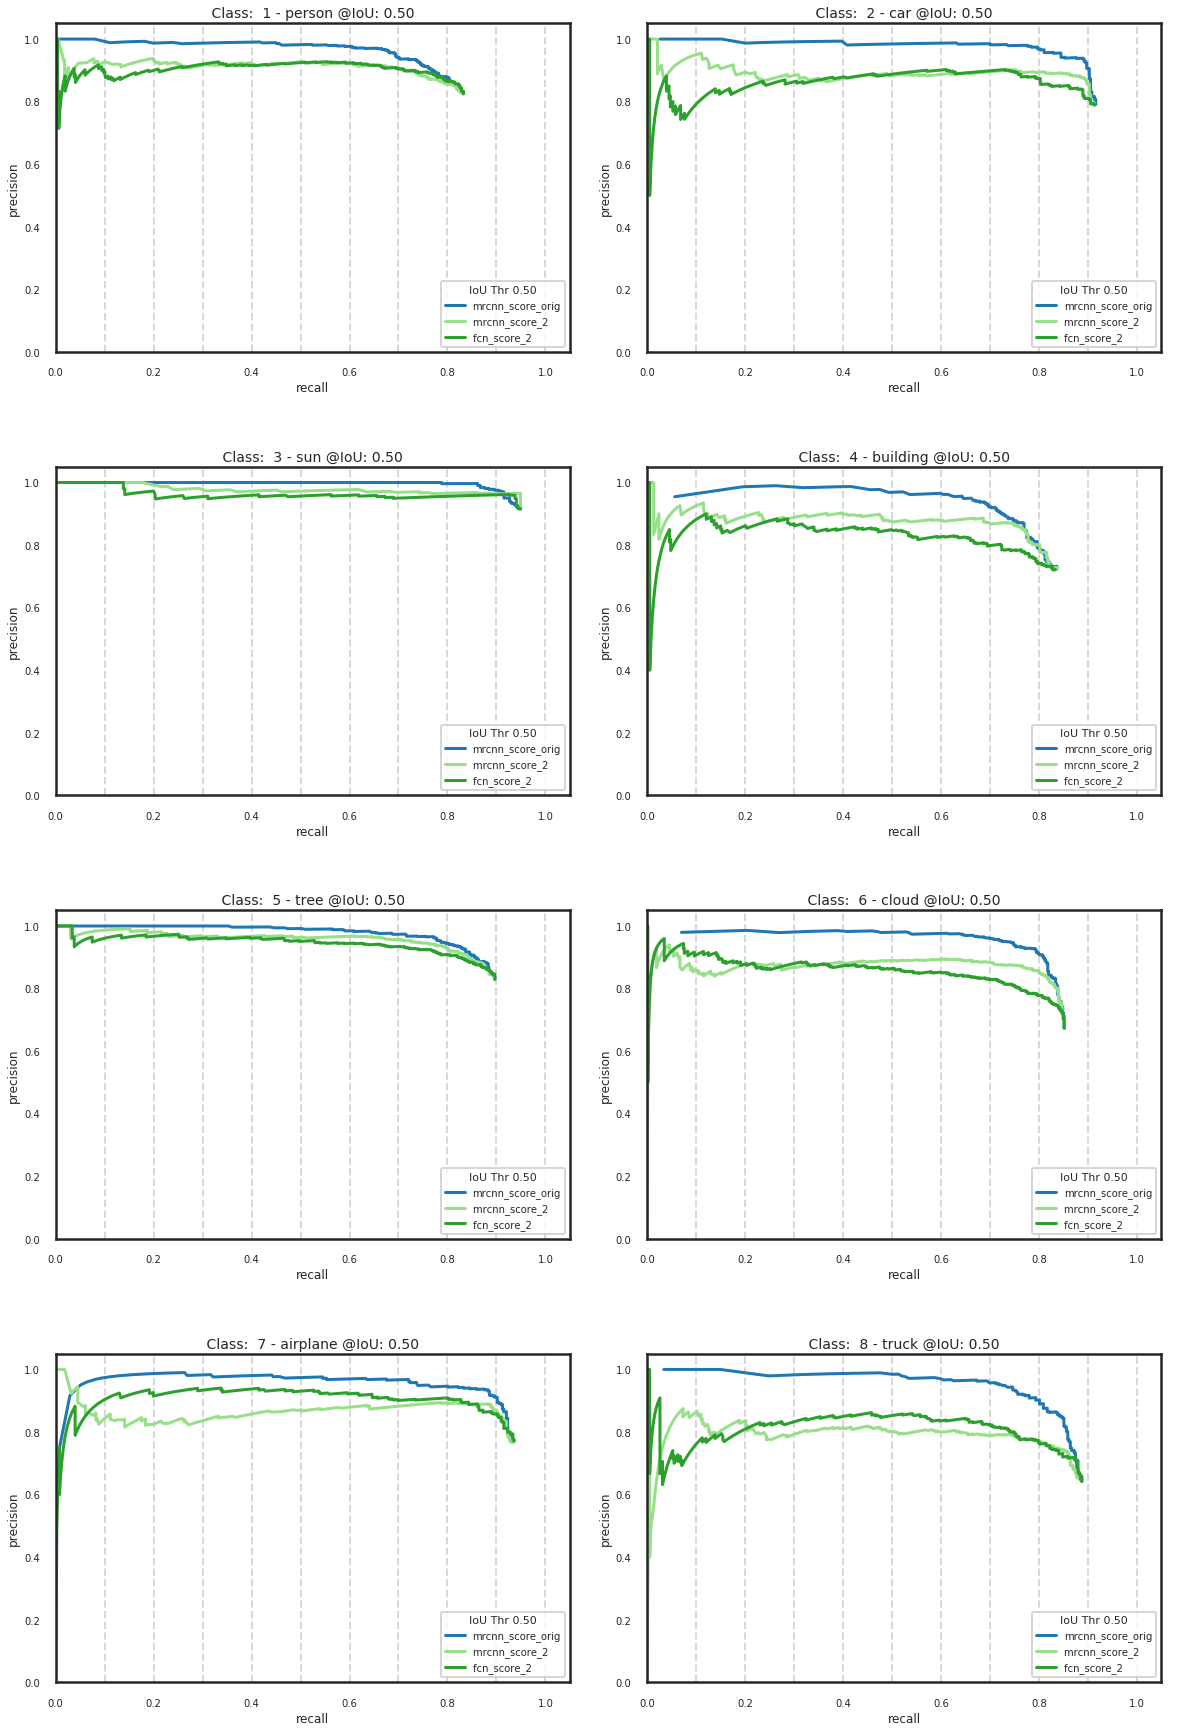

In [32]:
print('Epch:', epochs)
disp_classes = [1,2,3,4,5,6,7,8]
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_1',  'fcn_score_1']
# cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.50, columns = 2, min_y =0.7)
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.5, columns = 2)
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_2', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.5, columns = 2)

###  Calculate information for one class at one  threshold with different scores, e.g. 'scores')

col/rows:  2 5

                                                     AP @ IoU 0.75 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1     mrcnn_score_2       fcn_score_1       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.2931            0.2721            0.2613            0.2355            0.2197 
 2 - car                           0.3580            0.3422            0.3427            0.2936            0.3066 
 3 - sun                           0.5053            0.4800            0.4846            0.4736            0.4501 
 4 - building                      0.2769            0.2774            

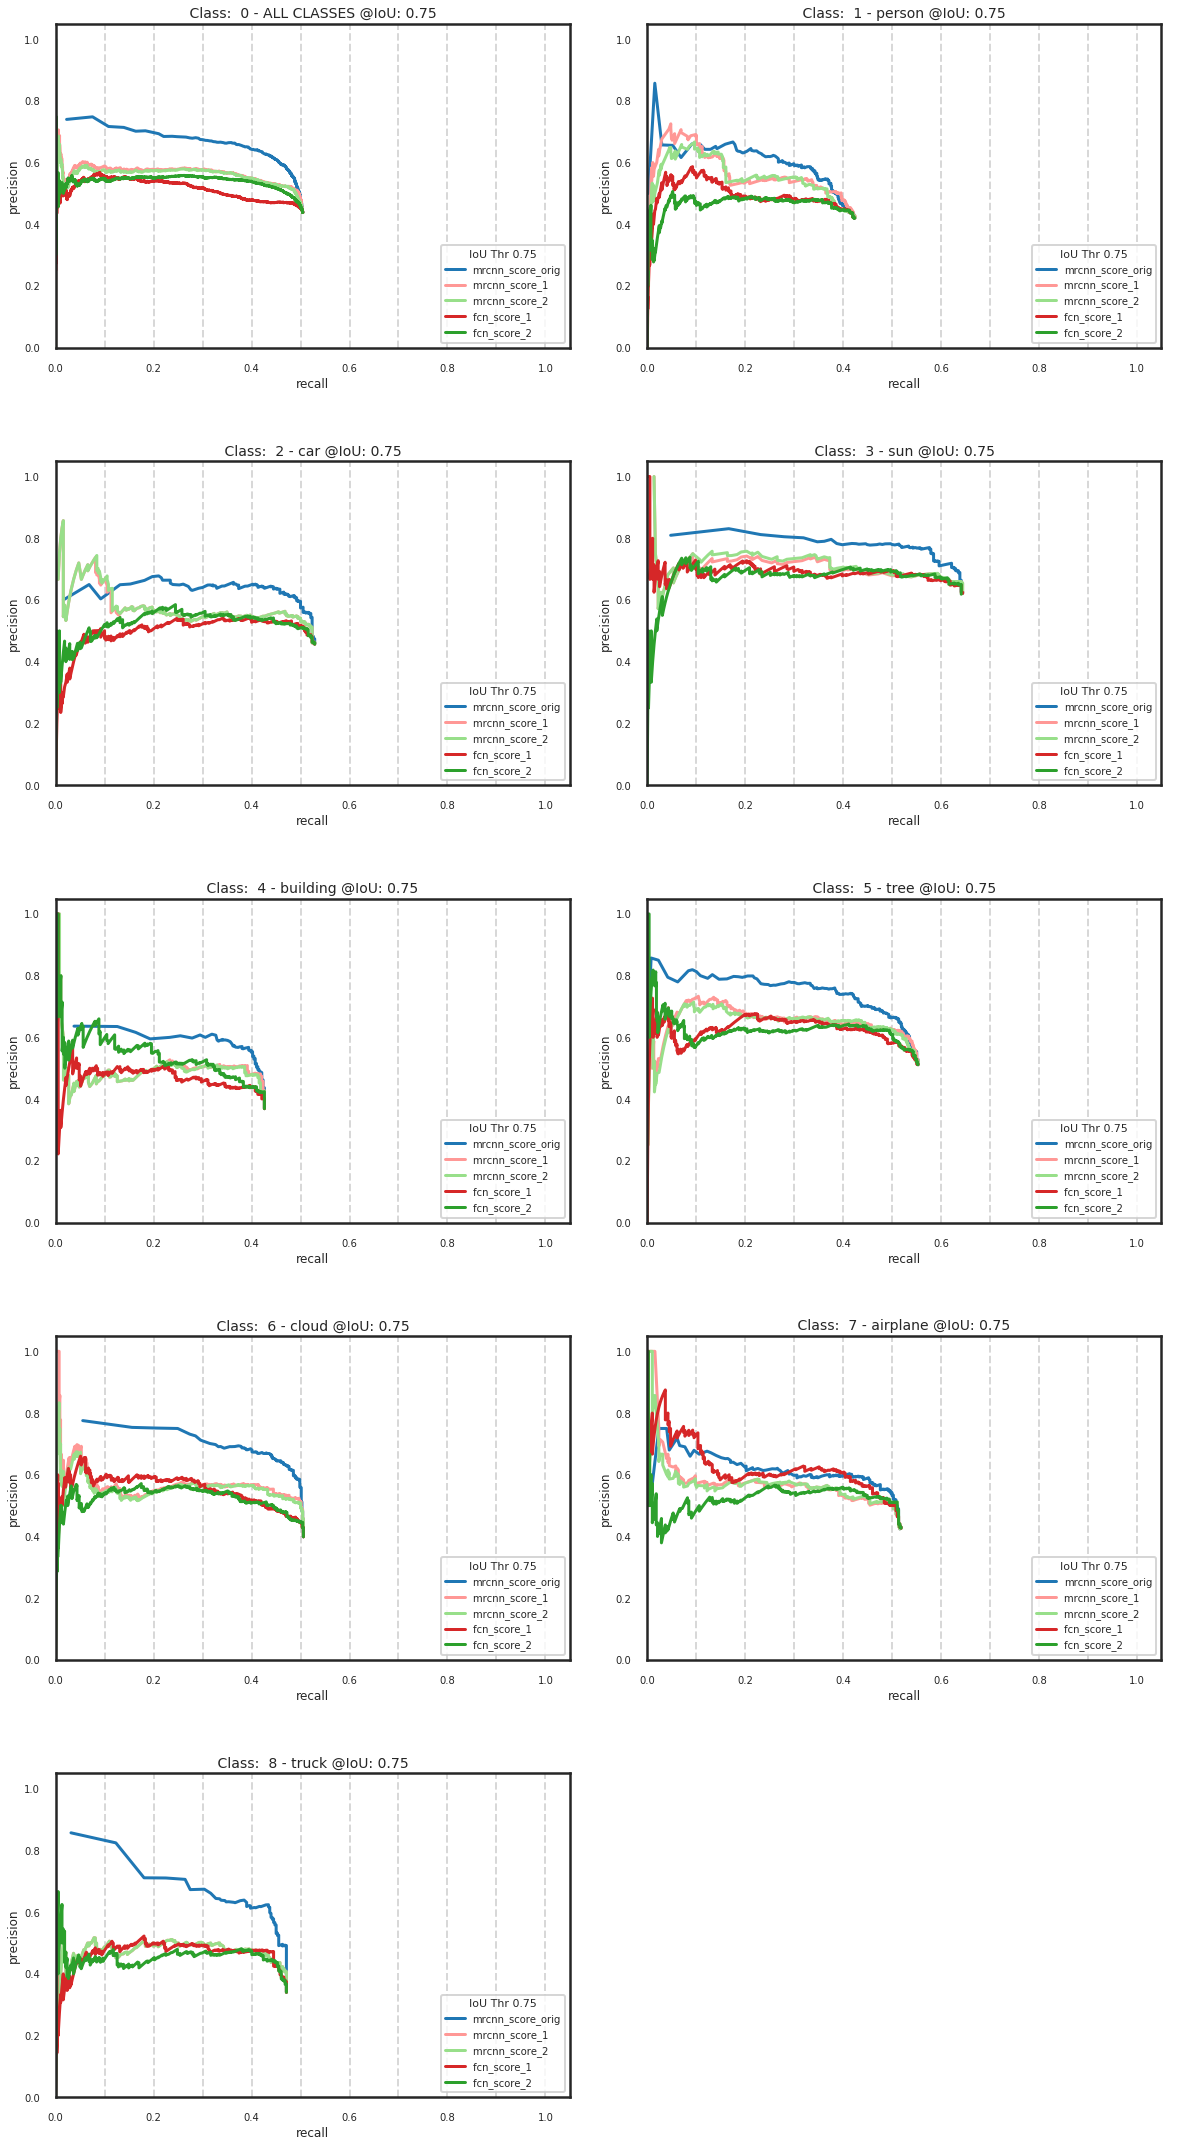

In [54]:
disp_classes = [0,1,2,3,4,5,6,7,8]  
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_1', 'mrcnn_score_2',  'fcn_score_1', 'fcn_score_2']

# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']

cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.75)

## Run barchart for all weight files

loaded : test_map_info_epoch0001_.pkl
Epch: 0001
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


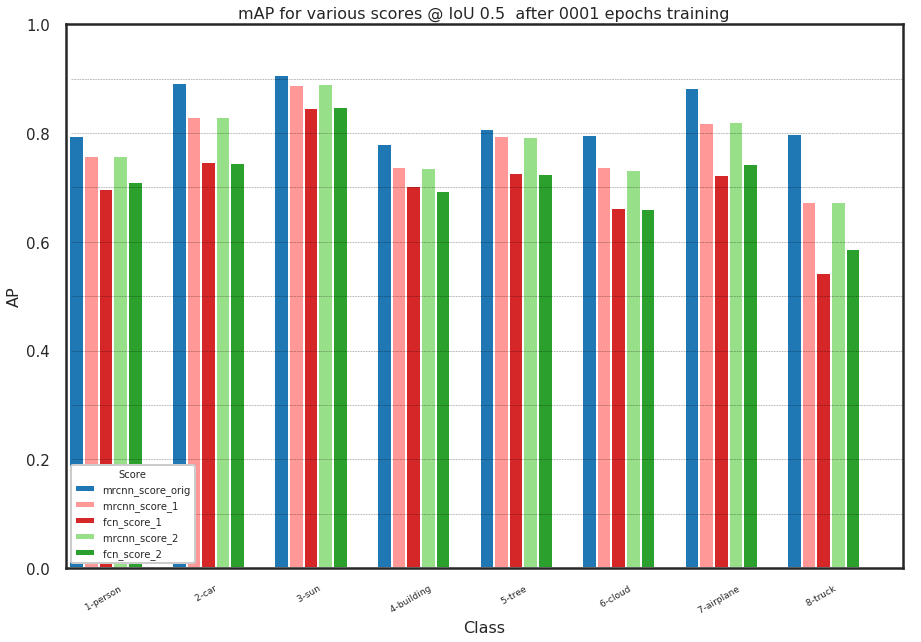


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0001 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            69.72%            75.83%            71.03% 
 2 - car                           89.16%            82.91%            74.66%            82.91%            74.52% 
 3 - sun                           90.66%            88.83%            84.58%            89.11%            84.82% 
 4 - building                      78.07%            73.72%            70.36%            73.53%            69.35% 
 

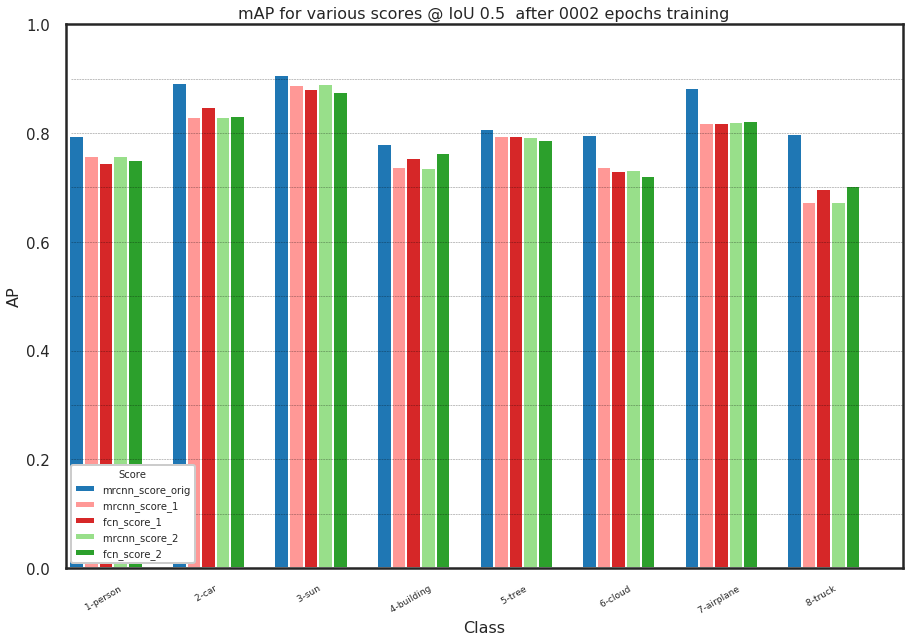


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0002 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            74.57%            75.83%            75.09% 
 2 - car                           89.16%            82.91%            84.80%            82.91%            83.24% 
 3 - sun                           90.66%            88.83%            88.17%            89.11%            87.53% 
 4 - building                      78.07%            73.72%            75.38%            73.53%            76.38% 
 

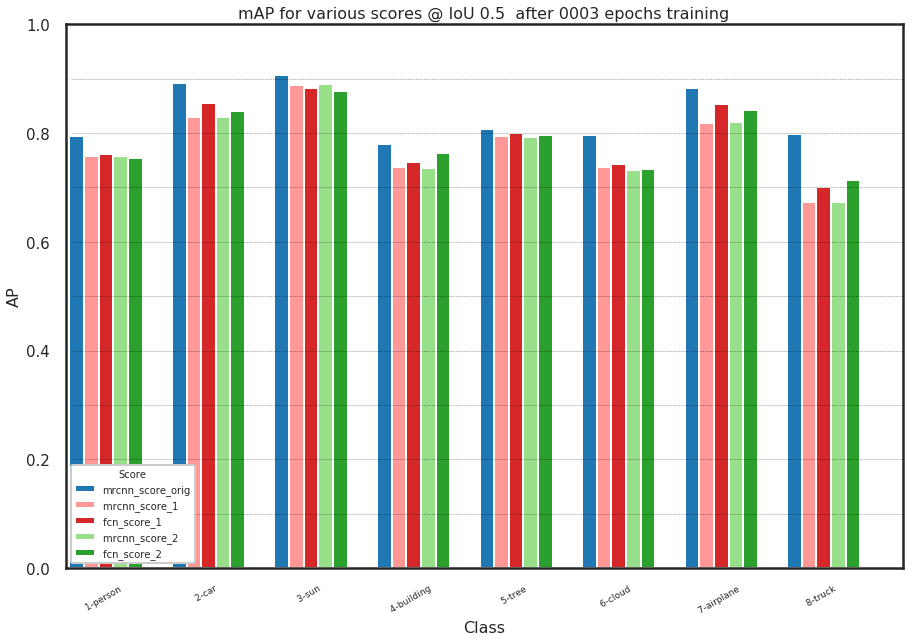


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0003 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.12%            75.83%            75.47% 
 2 - car                           89.16%            82.91%            85.53%            82.91%            84.03% 
 3 - sun                           90.66%            88.83%            88.37%            89.11%            87.69% 
 4 - building                      78.07%            73.72%            74.64%            73.53%            76.27% 
 

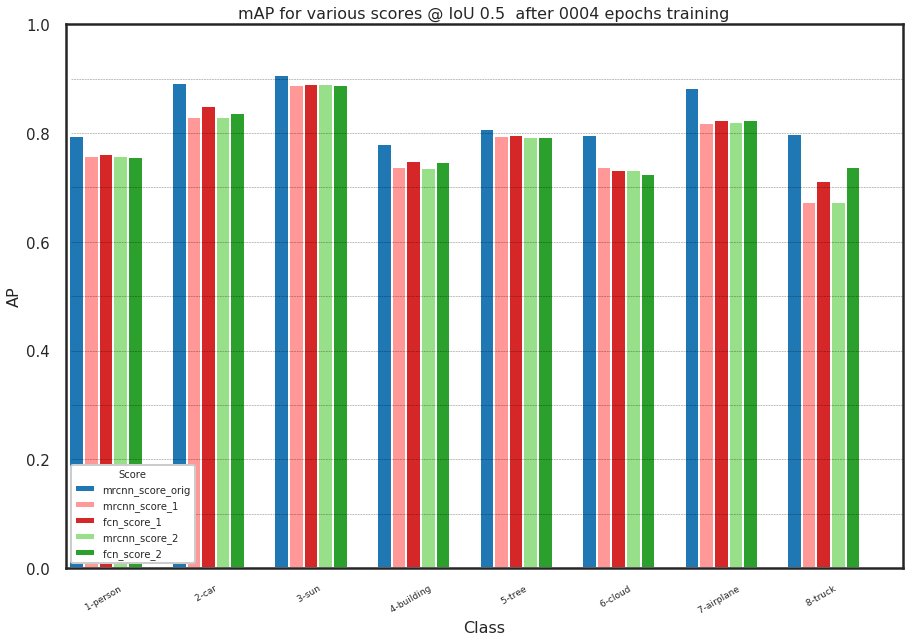


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0004 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.23%            75.83%            75.53% 
 2 - car                           89.16%            82.91%            84.95%            82.91%            83.74% 
 3 - sun                           90.66%            88.83%            89.10%            89.11%            88.79% 
 4 - building                      78.07%            73.72%            74.79%            73.53%            74.72% 
 

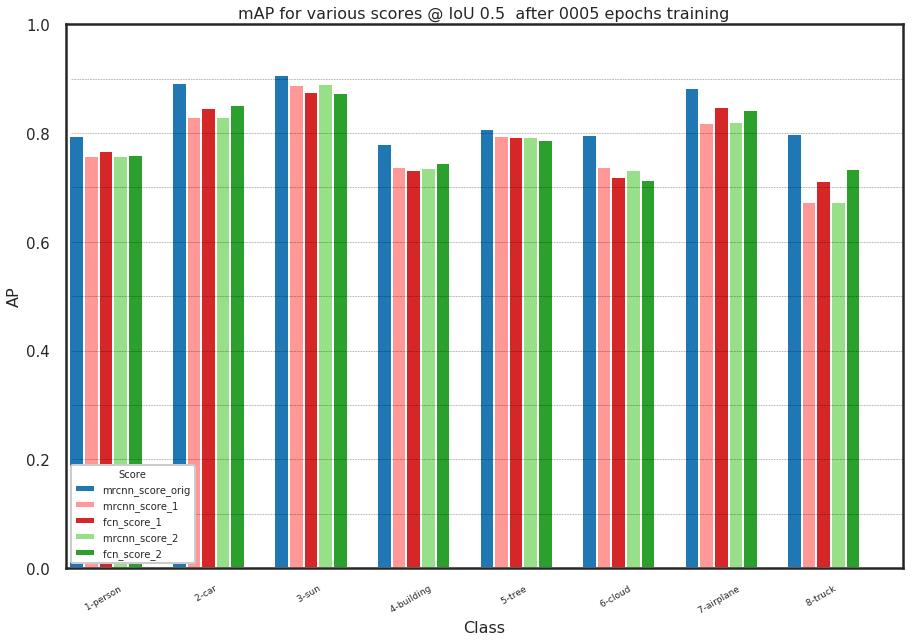


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0005 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.65%            75.83%            76.05% 
 2 - car                           89.16%            82.91%            84.54%            82.91%            85.15% 
 3 - sun                           90.66%            88.83%            87.63%            89.11%            87.47% 
 4 - building                      78.07%            73.72%            73.29%            73.53%            74.55% 
 

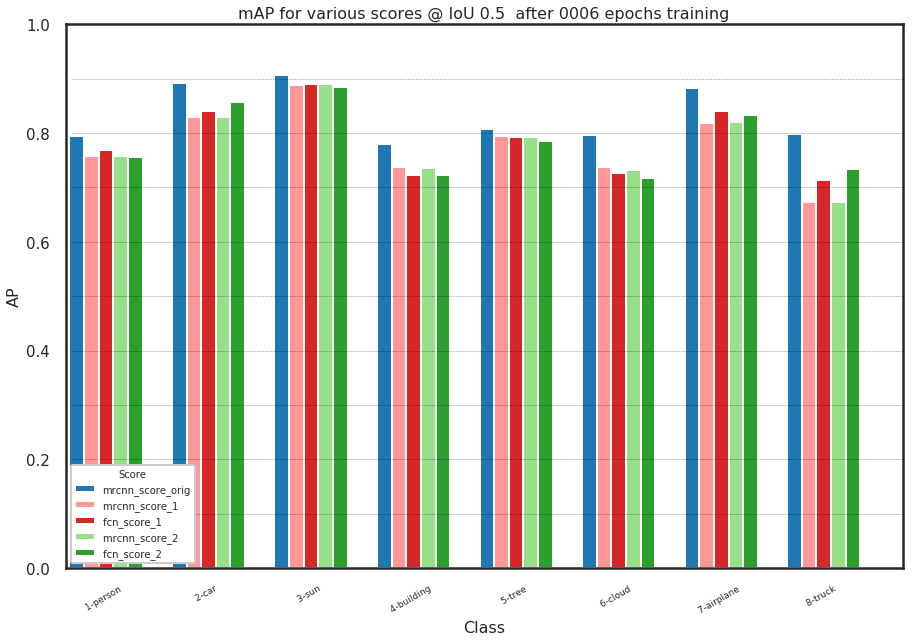


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0006 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.95%            75.83%            75.55% 
 2 - car                           89.16%            82.91%            84.12%            82.91%            85.72% 
 3 - sun                           90.66%            88.83%            89.12%            89.11%            88.40% 
 4 - building                      78.07%            73.72%            72.28%            73.53%            72.28% 
 

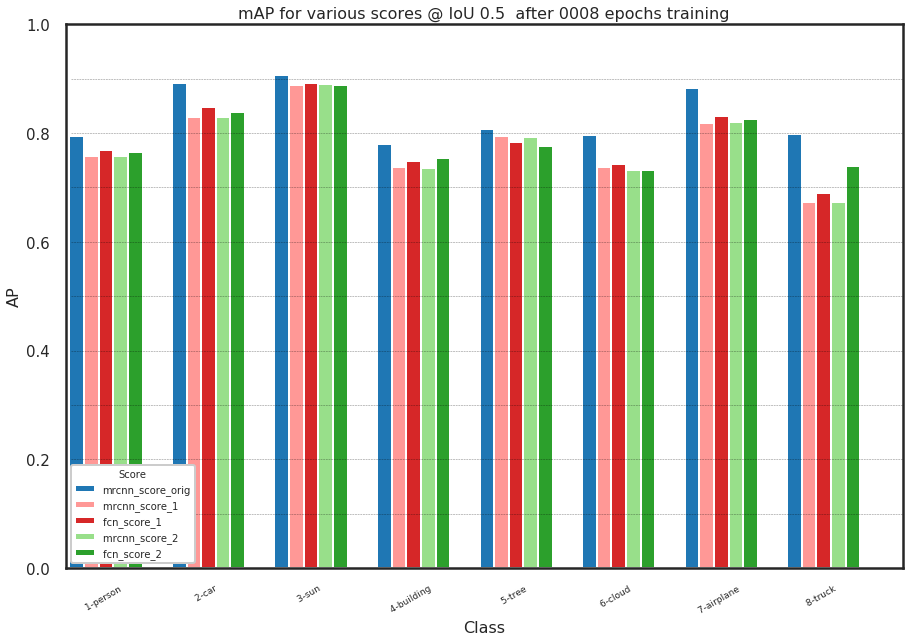


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0008 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.96%            75.83%            76.50% 
 2 - car                           89.16%            82.91%            84.88%            82.91%            83.90% 
 3 - sun                           90.66%            88.83%            89.21%            89.11%            88.80% 
 4 - building                      78.07%            73.72%            74.93%            73.53%            75.37% 
 

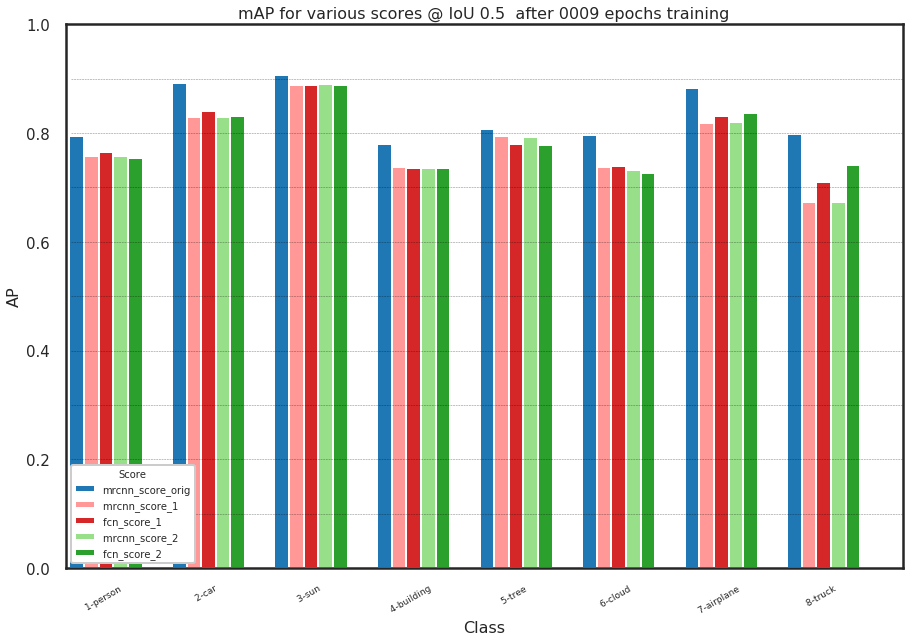


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0009 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.54%            75.83%            75.48% 
 2 - car                           89.16%            82.91%            83.98%            82.91%            83.22% 
 3 - sun                           90.66%            88.83%            88.90%            89.11%            88.87% 
 4 - building                      78.07%            73.72%            73.58%            73.53%            73.56% 
 

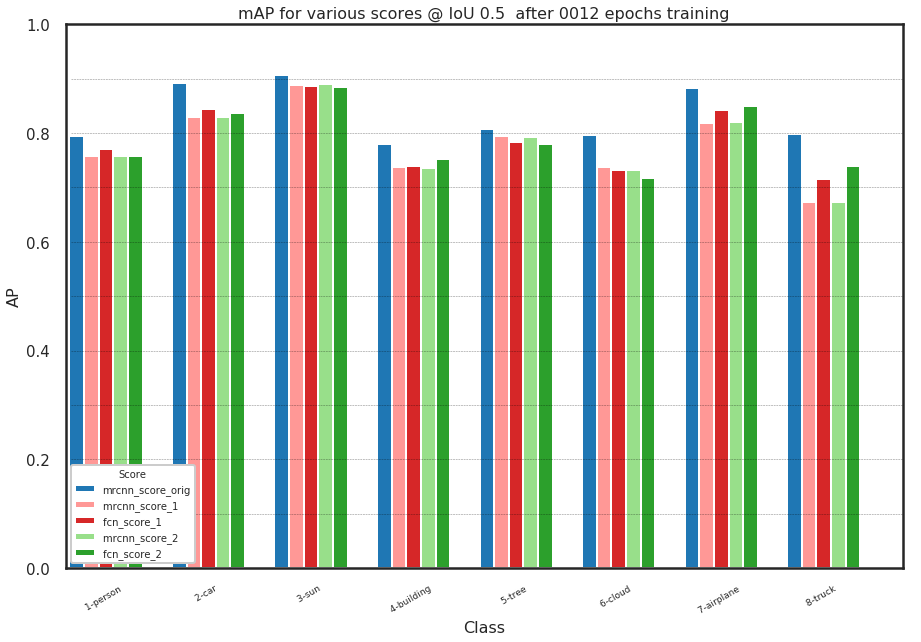


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0012 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            77.16%            75.83%            75.81% 
 2 - car                           89.16%            82.91%            84.41%            82.91%            83.72% 
 3 - sun                           90.66%            88.83%            88.61%            89.11%            88.40% 
 4 - building                      78.07%            73.72%            73.87%            73.53%            75.19% 
 

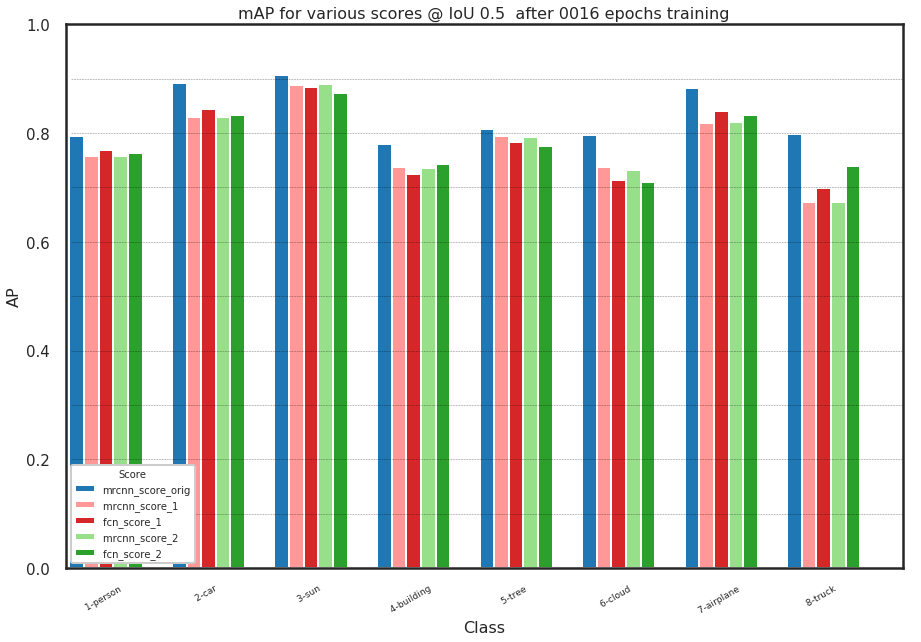


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0016 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.95%            75.83%            76.28% 
 2 - car                           89.16%            82.91%            84.49%            82.91%            83.34% 
 3 - sun                           90.66%            88.83%            88.41%            89.11%            87.46% 
 4 - building                      78.07%            73.72%            72.53%            73.53%            74.25% 
 

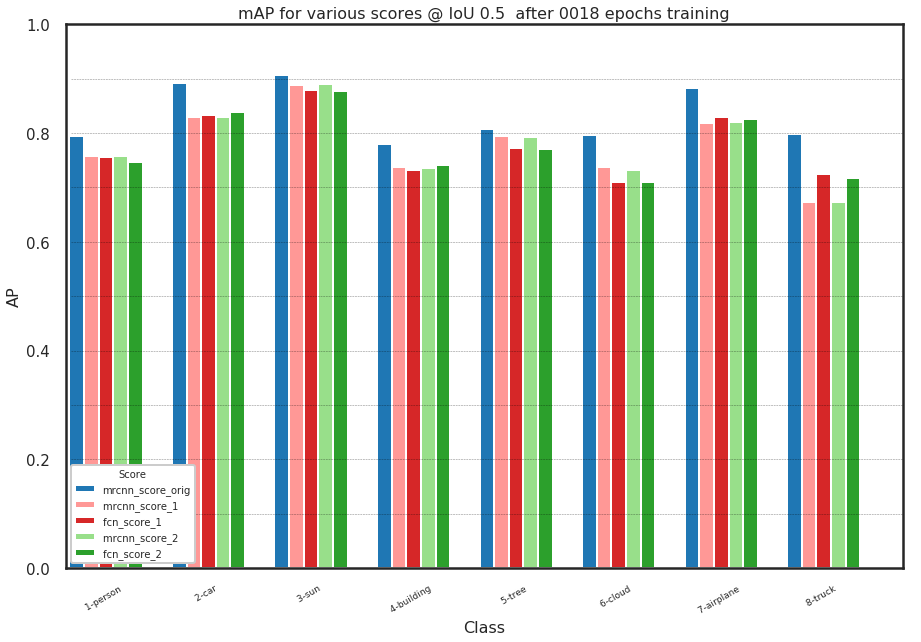


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0018 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            75.58%            75.83%            74.68% 
 2 - car                           89.16%            82.91%            83.32%            82.91%            83.97% 
 3 - sun                           90.66%            88.83%            87.93%            89.11%            87.82% 
 4 - building                      78.07%            73.72%            73.28%            73.53%            74.15% 
 

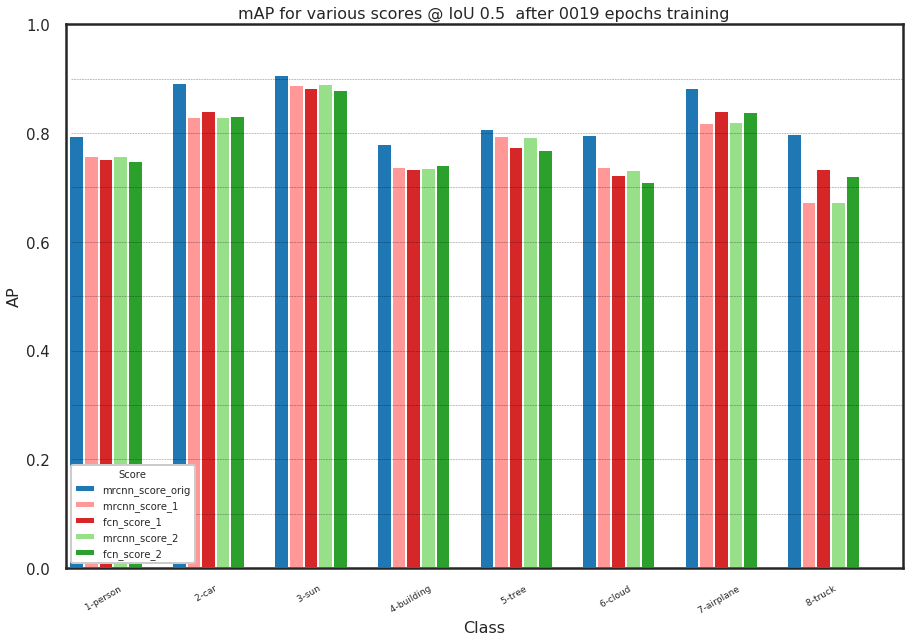


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0019 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            75.16%            75.83%            74.82% 
 2 - car                           89.16%            82.91%            84.16%            82.91%            83.10% 
 3 - sun                           90.66%            88.83%            88.30%            89.11%            88.00% 
 4 - building                      78.07%            73.72%            73.31%            73.53%            74.21% 
 

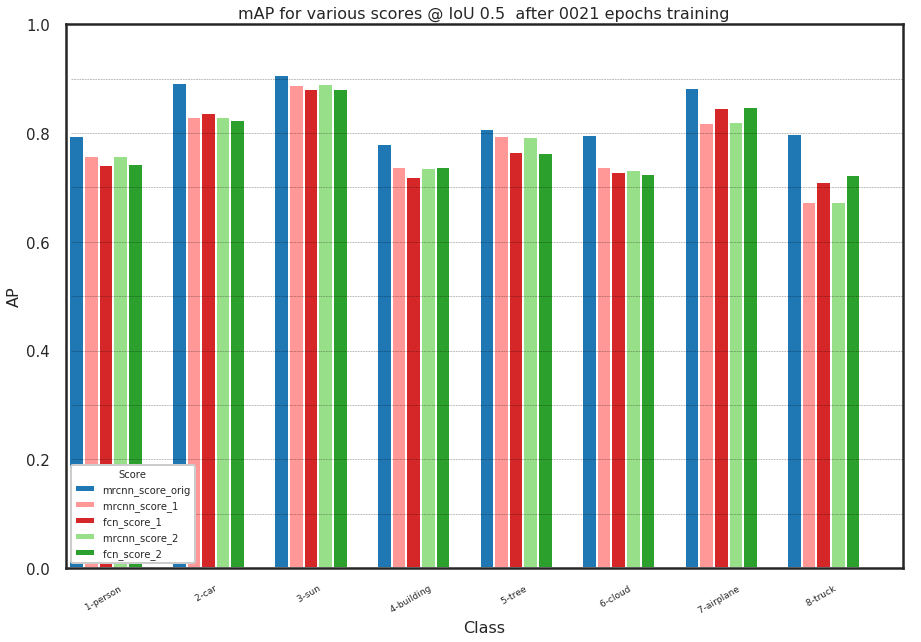


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0021 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            74.19%            75.83%            74.29% 
 2 - car                           89.16%            82.91%            83.76%            82.91%            82.33% 
 3 - sun                           90.66%            88.83%            88.03%            89.11%            88.04% 
 4 - building                      78.07%            73.72%            72.00%            73.53%            73.78% 
 

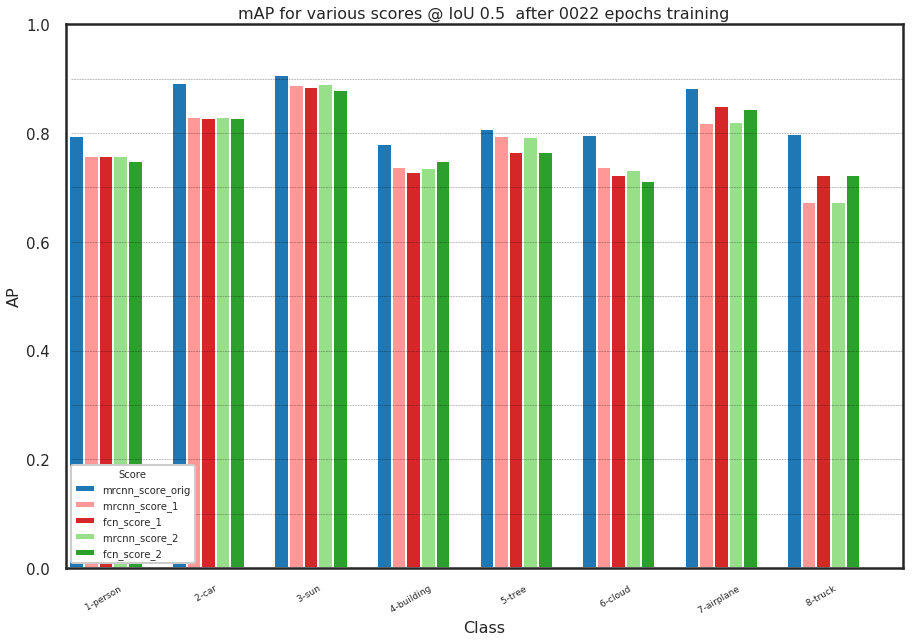


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0022 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            75.80%            75.83%            74.83% 
 2 - car                           89.16%            82.91%            82.70%            82.91%            82.79% 
 3 - sun                           90.66%            88.83%            88.54%            89.11%            87.90% 
 4 - building                      78.07%            73.72%            72.88%            73.53%            74.85% 
 

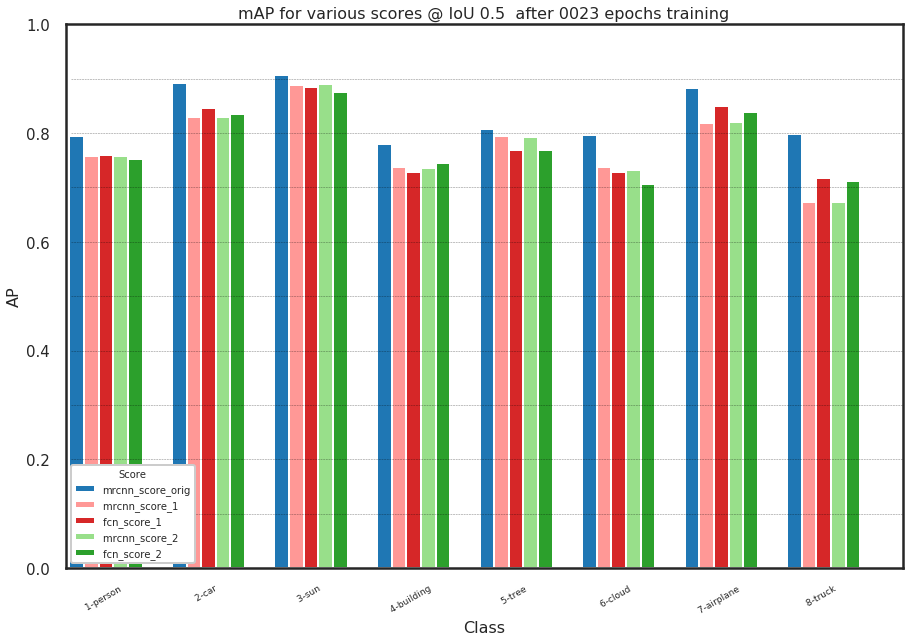


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0023 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            75.95%            75.83%            75.26% 
 2 - car                           89.16%            82.91%            84.53%            82.91%            83.49% 
 3 - sun                           90.66%            88.83%            88.52%            89.11%            87.57% 
 4 - building                      78.07%            73.72%            72.86%            73.53%            74.50% 
 

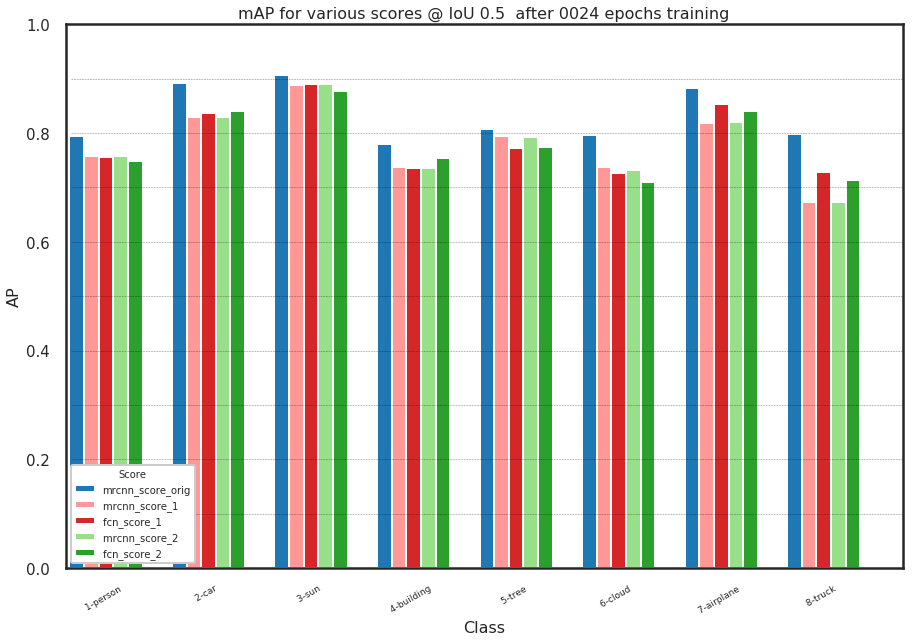


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0024 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            75.52%            75.83%            74.84% 
 2 - car                           89.16%            82.91%            83.78%            82.91%            84.00% 
 3 - sun                           90.66%            88.83%            89.00%            89.11%            87.73% 
 4 - building                      78.07%            73.72%            73.49%            73.53%            75.41% 
 

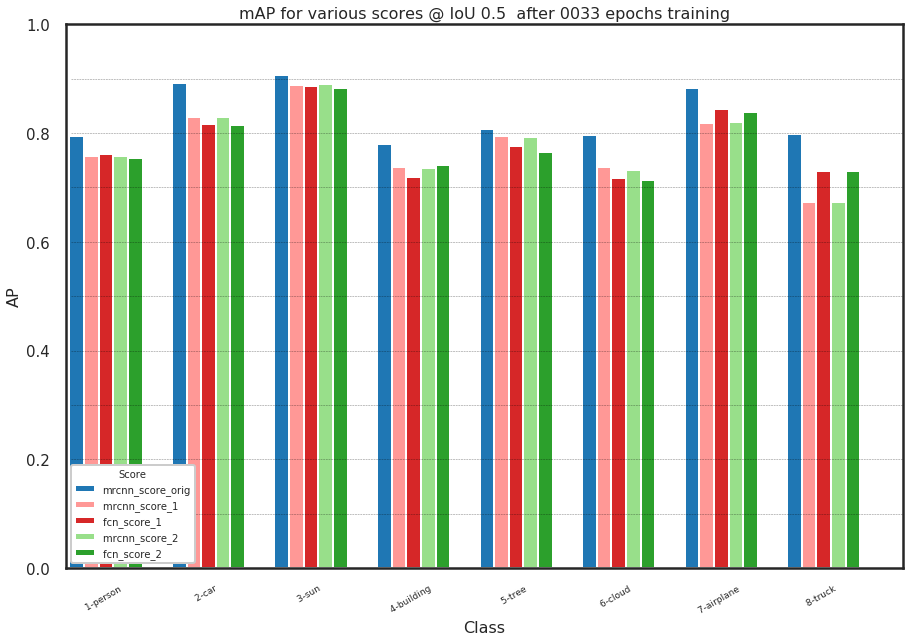


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0033 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.23%            75.83%            75.34% 
 2 - car                           89.16%            82.91%            81.76%            82.91%            81.57% 
 3 - sun                           90.66%            88.83%            88.70%            89.11%            88.33% 
 4 - building                      78.07%            73.72%            71.97%            73.53%            74.19% 
 

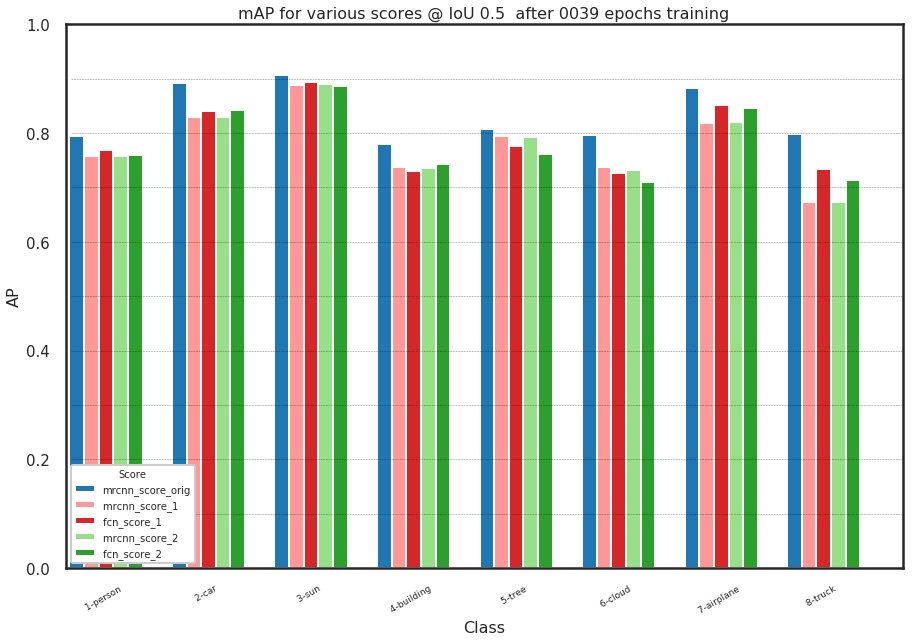


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0039 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.86%            75.83%            75.90% 
 2 - car                           89.16%            82.91%            84.06%            82.91%            84.34% 
 3 - sun                           90.66%            88.83%            89.31%            89.11%            88.68% 
 4 - building                      78.07%            73.72%            73.00%            73.53%            74.37% 
 

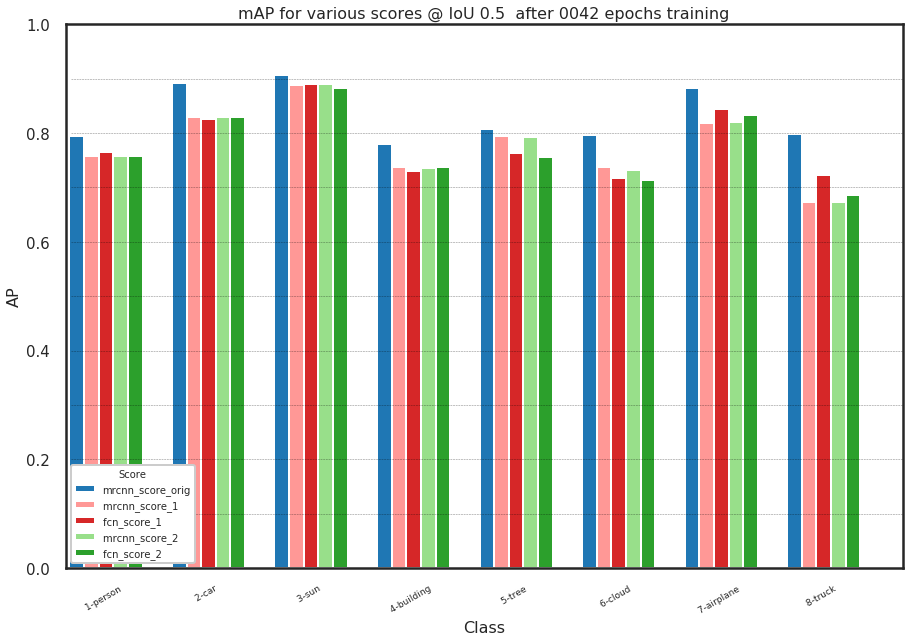


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0042 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.56%            75.83%            75.81% 
 2 - car                           89.16%            82.91%            82.54%            82.91%            82.88% 
 3 - sun                           90.66%            88.83%            89.09%            89.11%            88.23% 
 4 - building                      78.07%            73.72%            73.02%            73.53%            73.80% 
 

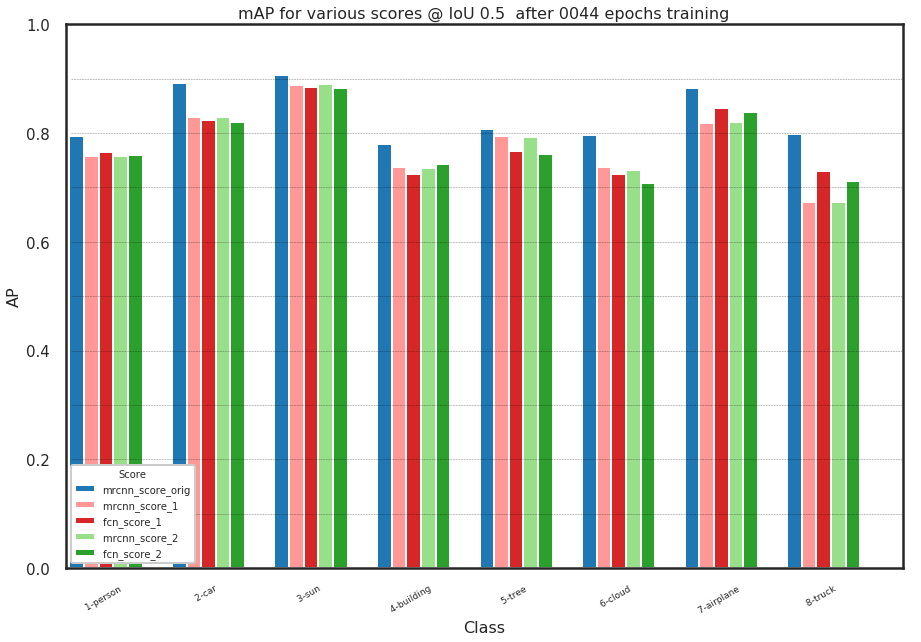


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0044 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.52%            75.83%            76.04% 
 2 - car                           89.16%            82.91%            82.46%            82.91%            81.99% 
 3 - sun                           90.66%            88.83%            88.53%            89.11%            88.29% 
 4 - building                      78.07%            73.72%            72.46%            73.53%            74.30% 
 

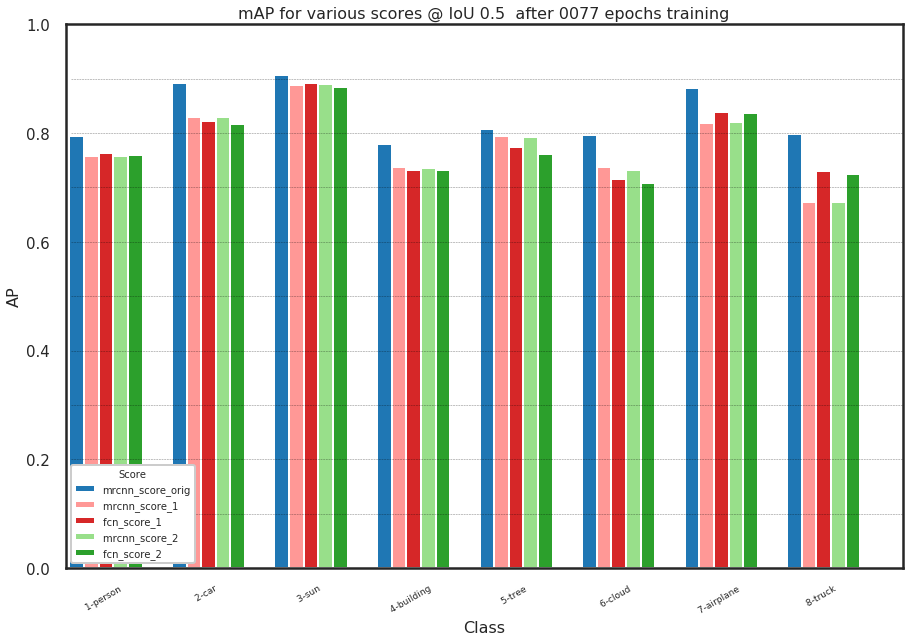


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0077 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.35%            75.83%            75.95% 
 2 - car                           89.16%            82.91%            82.24%            82.91%            81.75% 
 3 - sun                           90.66%            88.83%            89.31%            89.11%            88.46% 
 4 - building                      78.07%            73.72%            73.31%            73.53%            73.24% 
 

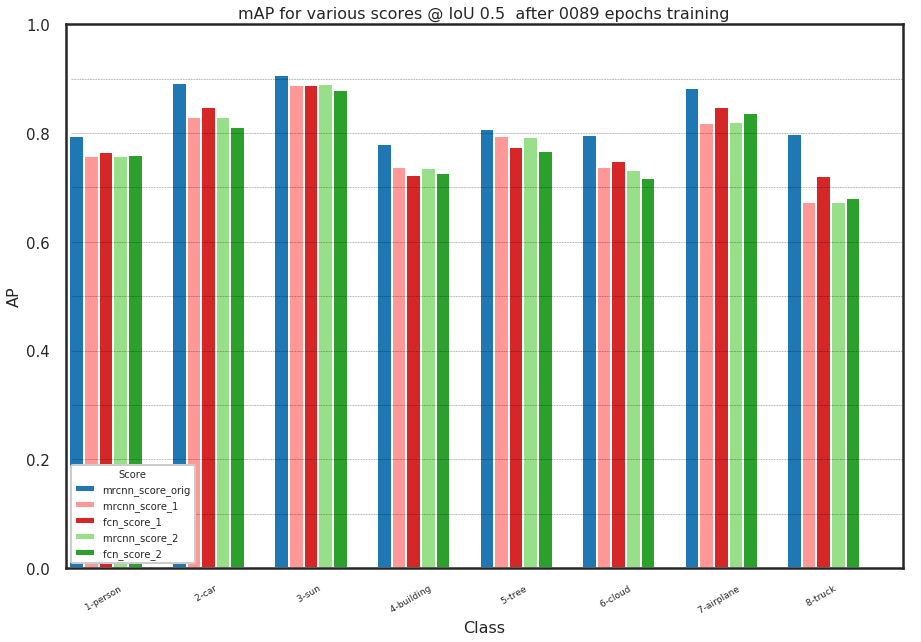


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0089 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.61%            75.83%            76.04% 
 2 - car                           89.16%            82.91%            84.83%            82.91%            81.14% 
 3 - sun                           90.66%            88.83%            88.91%            89.11%            87.99% 
 4 - building                      78.07%            73.72%            72.35%            73.53%            72.71% 
 

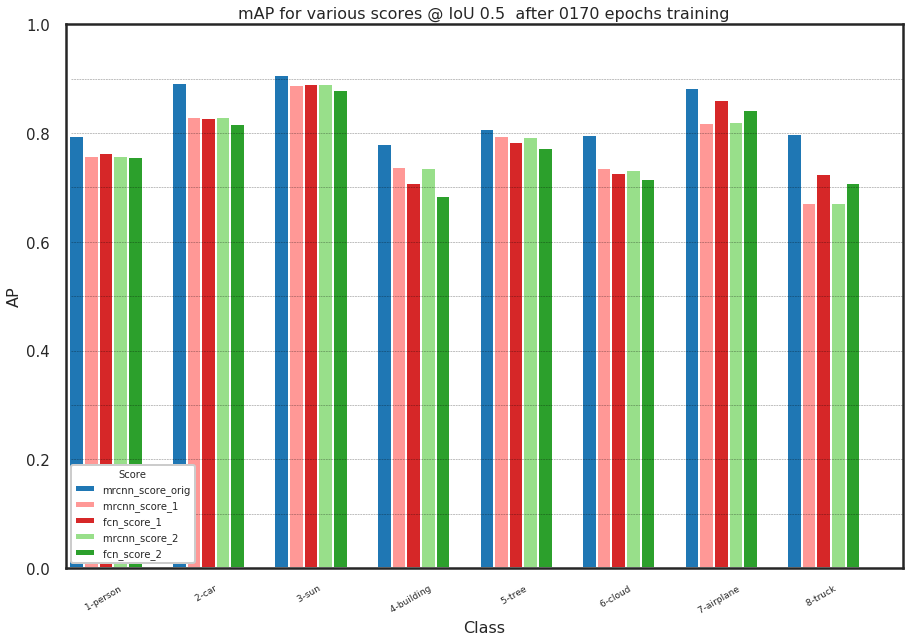


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0170 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.34%            75.83%            75.65% 
 2 - car                           89.16%            82.91%            82.83%            82.91%            81.72% 
 3 - sun                           90.66%            88.83%            88.99%            89.11%            87.86% 
 4 - building                      78.07%            73.72%            70.81%            73.53%            68.38% 
 

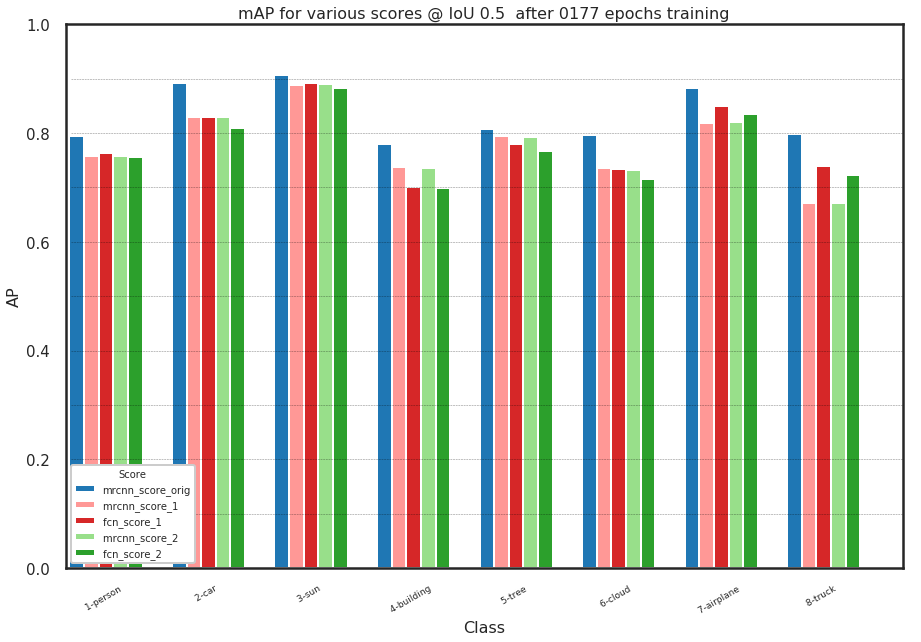


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0177 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.35%            75.83%            75.56% 
 2 - car                           89.16%            82.91%            83.01%            82.91%            80.99% 
 3 - sun                           90.66%            88.83%            89.25%            89.11%            88.38% 
 4 - building                      78.07%            73.72%            70.18%            73.53%            69.92% 
 

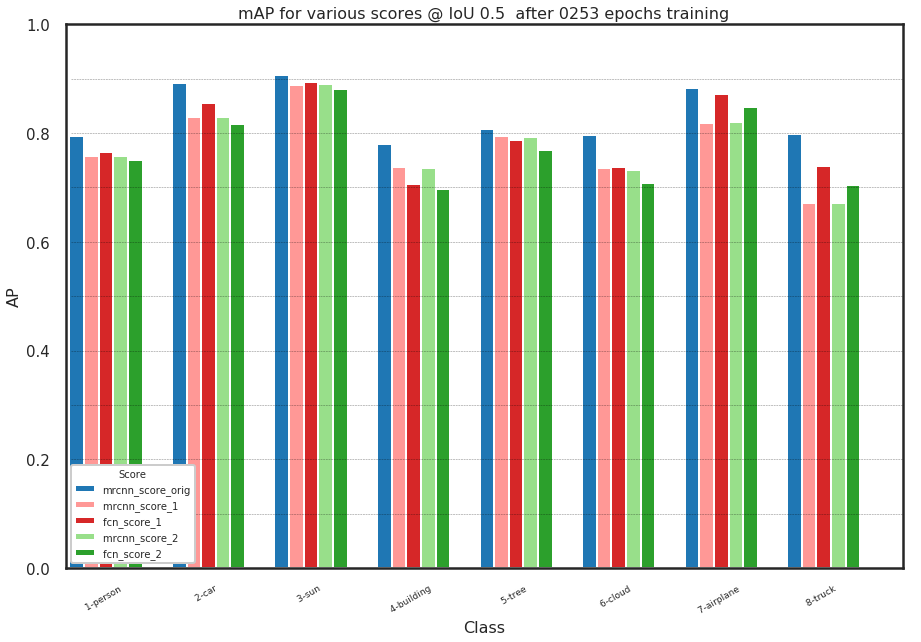


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0253 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.51%            75.83%            75.05% 
 2 - car                           89.16%            82.91%            85.49%            82.91%            81.75% 
 3 - sun                           90.66%            88.83%            89.39%            89.11%            88.19% 
 4 - building                      78.07%            73.72%            70.65%            73.53%            69.70% 
 

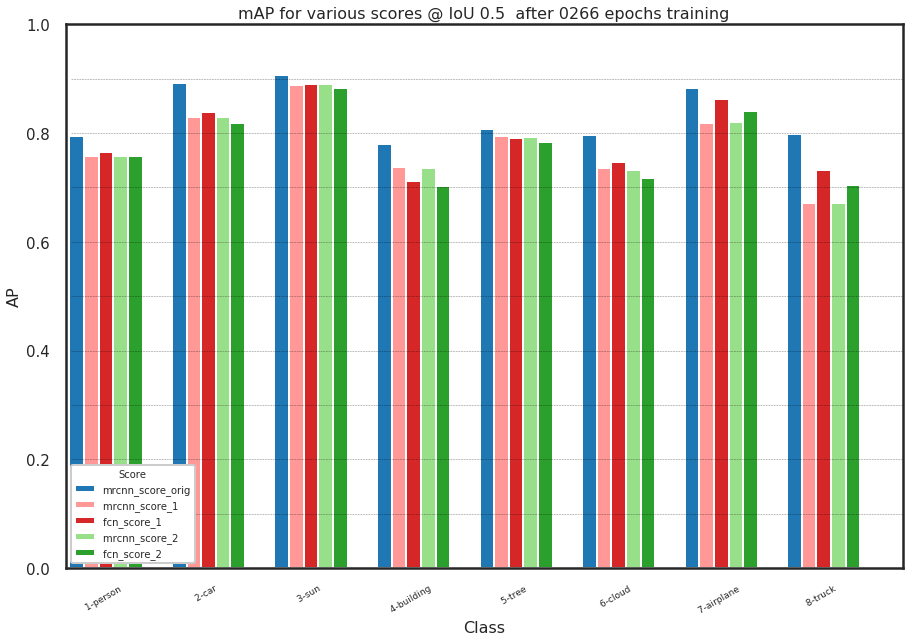


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 0266 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        79.49%            75.84%            76.44%            75.83%            75.77% 
 2 - car                           89.16%            82.91%            83.93%            82.91%            81.85% 
 3 - sun                           90.66%            88.83%            89.11%            89.11%            88.23% 
 4 - building                      78.07%            73.72%            71.21%            73.53%            70.32% 
 

In [6]:
disp_scores  = [ 'mrcnn_score_orig' ,'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']

for FILE_IDX in range(len(files)):
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
    map_info_file = 'test_map_info_epoch' +epochs+'_.pkl'
#     cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
#     pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
#     gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'

    with open(os.path.join(map_path, map_info_file), 'rb') as infile:
        all_data = pickle.load(infile)             
    print('loaded :', map_info_file)  
#     print('loaded :', cls_info_file)
    # disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    print('Epch:', epochs)
    cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epochs)


## misc code

In [ ]:
# cls = 1
# for i in pr_boxes_class[cls]:
#     print(i)
#     print(pr_boxes_class[cls][i]['scores'])
#     print(pr_boxes_class[cls][i]['mrcnn_score_orig'])
#     print(pr_boxes_class[cls][i]['mrcnn_score_norm'])
#     print('---------')

In [ ]:
pp.pprint(all_data[1].keys())

In [ ]:
# pp.pprint(all_data[1]['mrcnn_score_norm'])

In [ ]:
pp.pprint(all_data[1]['mrcnn_score_orig'])

In [ ]:
pp.pprint(all_data[1]['scores'])

In [ ]:
print(all_data[1]['mrcnn_score_0'])

In [ ]:
print(all_data[1]['mrcnn_score_1'])

In [ ]:
print(all_data[1]['mrcnn_score_2'])

In [ ]:
print(all_data[1]['scores'] == all_data[1]['mrcnn_score_orig'])

In [ ]:
for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
    print(idx, iou_thr, np.round(iou_thr,2))
for idx, iou_thr in enumerate(np.arange(0.5, 0.95, 0.05)):
    print(idx, iou_thr)    
for idx, iou_thr in enumerate(range(0.5, 0.95,  0.05)):
    print(idx, iou_thr)    

## Code from `calculate_mean_ap.py`

### `get_models_scores_map()`

In [ ]:
def get_model_scores_map(pred_boxes, score_key ):
    """Creates a dictionary of from model_scores to image ids.

    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'

    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)

    """
    model_scores_map = {}
    for img_id, val in pred_boxes.items():
        for raw_score in val['scores']:
            score = round(raw_score,5)
            if score not in model_scores_map.keys():
                model_scores_map[score] = [img_id]
            else:
                model_scores_map[score].append(img_id)
    return model_scores_map

In [ ]:
from copy import deepcopy
def get_avg_precision_at_iou(in_gt_boxes, in_pred_boxes, iou_thr=0.5, score_key = 'scores'):
    '''
    Calculates average precision at given IoU threshold.

    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (list of list of floats): list of locations of predicted
            objects as [xmin, ymin, xmax, ymax]
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.

    Returns:
        dict: avg precision as well as summary info about the PR curve

        Keys:
            'avg_prec' (float): average precision for this IoU threshold
            'precisions' (list of floats): precision value for the given
                model_threshold
            'recall' (list of floats): recall value for given
                model_threshold
            'models_thrs' (list of floats): model threshold value that
                precision and recall were computed for.
    '''
    gt_boxes = deepcopy(in_gt_boxes)
    pred_boxes = deepcopy(in_pred_boxes)
    model_scores_map    = get_model_scores_map(pred_boxes, score_key = score_key)
    sorted_model_scores = sorted(model_scores_map.keys())
    print('sorted_model_scores :' , sorted_model_scores)
    
    ## Sort the predicted boxes in ascending score order (lowest scoring boxes first):
    for img_id in pred_boxes.keys():
        
        arg_sort = np.argsort(pred_boxes[img_id][score_key])
        print()
        print('image_id : ', img_id)
        print('--------------------------')
        print('scores:', pred_boxes[img_id]['scores'] )
        print(score_key, ':' ,pred_boxes[img_id][score_key] )
        print(pred_boxes[img_id]['boxes'] )
        print('argsort:' , arg_sort)
        pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id][score_key])[arg_sort].tolist()
        pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()
        print('after')
        print('--------------------------')
        print('scores:', pred_boxes[img_id]['scores'] )
        print(score_key, ':' ,pred_boxes[img_id][score_key] )
        print(pred_boxes[img_id]['boxes'] )
        
        
    pred_boxes_pruned = deepcopy(pred_boxes)

    precisions  = []
    recalls     = []
    model_thrs  = []
    img_results = {}
    
    # Loop over model score thresholds and calculate precision, recall
    for ithr, model_score_thr in enumerate(sorted_model_scores[:-1]):
        # On first iteration, define img_results for the first time:
        print('------------------------------------------------')
        print('ithr ', ithr, 'model_scr_thr', model_score_thr)
        print('------------------------------------------------')
        img_ids = gt_boxes.keys() if ithr == 0 else model_scores_map[model_score_thr]
        for img_id in img_ids:
            gt_boxes_img = gt_boxes[img_id]['boxes']
            box_scores = pred_boxes_pruned[img_id]['scores']
            start_idx = 0
            for score in box_scores:
                if score <= model_score_thr:
#                     pred_boxes_pruned[img_id]
                    start_idx += 1
                else:
                    break
            print('Start Idx is ', start_idx)
            # Remove boxes, scores of lower than threshold scores:
            pred_boxes_pruned[img_id]['scores'] = pred_boxes_pruned[img_id]['scores'][start_idx:]
            pred_boxes_pruned[img_id]['boxes']  = pred_boxes_pruned[img_id]['boxes'][start_idx:]

            # Recalculate image results for this image
            img_results[img_id] = cmap.get_single_image_results(
                gt_boxes_img, pred_boxes_pruned[img_id]['boxes'], iou_thr)
            print('image_id : ', img_id)
            print('--------------------------')            
            pp.pprint(gt_boxes_img)
            pp.pprint(pred_boxes_pruned[img_id]['boxes'])
            pp.pprint(img_results[img_id])
            print()
        prec, rec = cmap.calc_precision_recall(img_results)
        print('precision:', prec, 'Recall:', rec)
        precisions.append(prec)
        recalls.append(rec)
        model_thrs.append(model_score_thr)

    precisions = np.array(precisions)
    recalls = np.array(recalls)
    print('final precsions:', precisions)
    print('final recall   :', recalls)
    prec_at_rec = []
    for recall_level in np.linspace(0.0, 1.0, 11):
        try:
            args = np.argwhere(recalls >= recall_level).flatten()
            prec = max(precisions[args])
        except ValueError:
            prec = 0.0
        prec_at_rec.append(prec)
    avg_prec = np.mean(prec_at_rec)

    return {
        'avg_prec': avg_prec,
        'precisions': precisions,
        'recalls': recalls,
        'model_thrs': model_thrs}


In [ ]:
class_ids = [1,2,3,4,5,6]
## build gt_boxes_class, pr_boxes_class which only containing info for each class 
gt_boxes_class = {}
pr_boxes_class = {}

for cls in class_ids :
    print('class id :', cls)
    a, b = filter_by_class(gt_boxes, pr_boxes, class_id= cls)
    gt_boxes_class[cls] = a
    pr_boxes_class[cls] = b
print(gt_boxes_class.keys())    
print(pr_boxes_class.keys())    
print(gt_boxes_class[1]['newshapes_00992'].keys())


In [ ]:
# msm = get_model_scores_map(pr_boxes_class[1], score_key = 'scores') 
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
# msm = get_model_scores_map(pr_boxes_class[1], score_key = 'scores') 
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

print()

print(pr_boxes['newshapes_00992']['class_ids'])
print(pr_boxes['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes['newshapes_00992']['scores'])
print(pr_boxes['newshapes_00992']['boxes'])

In [ ]:
data1 = get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'scores')
print(data1)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data2 = get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_orig')
print(data2)

In [ ]:
print(data1)
print(data2)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data3 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_orig')
print(data3)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data4 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'scores')
print(data4)

In [ ]:
data5 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_norm')
print(data5)

In [ ]:
print(data3)
print(data4)
print(data5)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_norm'])
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])